<a href="https://colab.research.google.com/github/Saibot19/7506R-1C2023-GRUPO21/blob/TP1/7506R_TP1_GRUPO21_CHP1_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://upload.wikimedia.org/wikipedia/commons/0/0d/FIUBA_gris_transparente.png" width="220" align="right" >




# **Organización de Datos (75.06)**
        
## **Trabajo Práctico 1.**  
        
**Grupo 21:** 
* Cuevas; Juan Francisco. 
* Pata; Martín. 
* Serpa; Tobías.

---


## **Importación de librerias y Dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Datasets/hotels_train.csv")

#Borramos columnas que no deberian estar
df.drop("reservation_status_date", axis="columns", inplace=True)

df_trabajo = df.copy()
df_trabajo

Mounted at /content/drive


hotel  lead_time  arrival_date_year arrival_date_month  \
0        City Hotel         49               2016          September   
1      Resort Hotel          4               2015            October   
2        City Hotel         25               2016            October   
3        City Hotel         26               2016           December   
4        City Hotel        104               2017              March   
...             ...        ...                ...                ...   
61908  Resort Hotel         24               2017            January   
61909    City Hotel          0               2016          September   
61910    City Hotel         10               2017                May   
61911  Resort Hotel        143               2015            October   
61912    City Hotel         57               2016              April   

       arrival_date_week_number  arrival_date_day_of_month  \
0                            37                          5   
1                            44                         31   
2                            42                         13   
3                            51                         12   
4                            12                         19   
...                         ...                        ...   
61908                         4                         27   
61909                        36                          2   
61910                        19                          8   
61911                        41                         10   
61912                        17                         17   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                            1                     2       1       0.0  ...   
1                            0                     1       2       0.0  ...   
2                            0                     1       2       2.0  ...   
3                            2                     5       2       0.0  ...   
4                            2                     5       2       0.0  ...   
...                        ...                   ...     ...       ...  ...   
61908                        0                     2       2       0.0  ...   
61909                        0                     1       1       0.0  ...   
61910                        1                     2       1       0.0  ...   
61911                        2                     5       2       0.0  ...   
61912                        2                     5       2       0.0  ...   

       deposit_type  agent company days_in_waiting_list    customer_type  \
0        No Deposit    9.0     NaN                    0        Transient   
1        No Deposit    NaN     NaN                    0        Transient   
2        No Deposit    9.0     NaN                    0        Transient   
3        Non Refund  154.0     NaN                    0        Transient   
4        No Deposit   20.0     NaN                    0  Transient-Party   
...             ...    ...     ...                  ...              ...   
61908    No Deposit  240.0     NaN                    0        Transient   
61909    No Deposit    NaN     NaN                    0        Transient   
61910    No Deposit    NaN   153.0                    0        Transient   
61911    Non Refund   96.0     NaN                    0        Transient   
61912    No Deposit    9.0     NaN                    0        Transient   

          adr  required_car_parking_spaces  total_of_special_requests  \
0      115.50                            0                          1   
1       42.00                            1                          0   
2      229.00                            0                          2   
3       75.00                            0                          0   
4       75.00                            0                          1   
...       ...                          ...                        ...   
61908   48.00                  

---


## Exploracion Inicial

analizar cada variable, considerando los siguientes aspectos
- Tipo de variable
- Variables Cuantitativas: calcular medidas de resumen: media, mediana,moda, etc
- Variables Cualitativas: reportar los posibles valores que toman y cuán
frecuentemente lo hacen.
- Determinar si existen variables irrelevantes para el análisis
- Realizar un análisis gráfico de las distribuciones de las variables
- Analizar las correlaciones existentes entre las variables.
- Analizar la relación de las variables con el target

---

### Descripcion de las variables

A continuacion tenemos la siguientes variables.

In [ ]:
df.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

| **Variable** | **Tipo** | **Descripción**|
|--------------|----------|----------------|
| **hotel**                     | Variable categorica  | Tipo de hotel |
| **lead_time**                 | Variable cuantitativa discreta | Días entre el momento en que se hizo la reserva y la fecha de llegada |
| **arrival_date_year**         | Variable cuantitativa discreta | Año de llegada |
| **arrival_date_month**        | Variable cuantitativa discreta | Mes de llegada |
| **arrival_date_week_number**  | Variable cuantitativa discreta | Número de semana del año de llegada |
| **arrival_date_day_of_month** | Variable cuantitativa discreta | Día del mes de llegada |
| **stays_in_weekend_nights**   | Variable cuantitativa discreta | Número de noches de fin de semana (sábado o domingo) que el huésped se queda en el hotel |
| **stays_in_week_nights**      | Variable cuantitativa discreta | Número de noches de entre semana que el huésped se queda en el hotel |
| **adults**                    | Variable cuantitativa discreta | Número de adultos en la reserva |
| **children**                  | Variable cuantitativa discreta | Número de niños en la reserva |
| **babies**                    | Variable cuantitativa discreta | Número de bebés en la reserva |
| **meal**                      | Variable categorica            | Tipo de comida en la reserva.<br>**Undefined/SC** – no meal package<br>**BB** – Bed & Breakfast<br>**HB** – Half board (breakfast and one other meal – usually dinner)<br>**FB** – Full board (breakfast, lunch and dinner) |
| **country**                   | Variable categorica            | País de origen del huésped |
| **market_segment**            | Variable categorica            | Segmento de mercado de la reserva |
| **distribution_channel**      | Variable categorica            | Canal de distribución de la reserva |
| **is_repeated_guest**         | Variable categorica            | Indica si el huésped ha reservado en el hotel anteriormente |
| **previous_cancellations**    | Variable cuantitativa discreta | Número de reservas canceladas anteriormente por el huésped |
| **previous_bookings_not_canceled**|Variable cuantitativa discreta| Número de reservas que el huésped ha realizado y no fueron canceladas |
| **reserved_room_type**        | Variable categorica            | Tipo de habitación reservada |
| **assigned_room_type**        | Variable categorica            | Tipo de habitación asignada |
| **booking_changes**           | Variable cuantitativa discreta | Número de cambios realizados en la reserva |
| **deposit_type**              | Variable categorica            | Tipo de depósito realizado por el huésped |
| **agent**                     | Variable categorica            | ID de la agencia de viajes a través de la cual se hizo la reserva |
| **company**                   | Variable categorica            | ID de la compañía que realizó la reserva o pagó por ella |
| **days_in_waiting_list**      | Variable cuantitativa discreta | Número de días que la reserva estuvo en lista de espera antes de ser confirmada |
| **customer_type**             | Variable categorica            | Tipo de cliente.<br>**Contract** - when the booking has an allotment or other type of contract associated to it;<br>**Group** – when the booking is associated to a group;<br>**Transient** – when the booking is not part of a group or contract, and is not associated to other transient booking;<br> **Transient-party** – when the booking is transient, but is associated to at least other transient booking |
| **adr**                       | Variable cuantitativa continua | Tarifa diaria promedio (Average Daily Rate) de la reserva |
| **required_car_parking_spaces**|Variable cuantitativa discreta | Número de plazas de aparcamiento solicitadas por el huésped |
| **total_of_special_requests** | Variable cuantitativa discreta | Número de solicitudes especiales realizadas por el huésped |
| **id**                        | Variable categorica            | Identificador único de la reserva |
| **is_canceled**               | Variable categorica            | Indica si la reserva fue cancelada (1) o no (0) |

Ya de por si podemos decir que la variable **id** es una variable irrelevante ya que seria unico para cada reserva. (Esta variable va a ser usada despues para subir resultados a Kaggle)
 

In [ ]:
df_trabajo.drop("id", axis="columns", inplace=True)

---

### Variables cuantitativas

A continuacion se va a indagar mas sobre las variables cuantitativas, fijandonos en su distribucion y su relacion con el target is_canceled

In [ ]:
vars_cual = ["lead_time","arrival_date_year","arrival_date_week_number","arrival_date_day_of_month","stays_in_weekend_nights","stays_in_week_nights",
              "adults","children","babies","is_repeated_guest","previous_cancellations","previous_bookings_not_canceled","booking_changes","days_in_waiting_list",
              "adr","required_car_parking_spaces","total_of_special_requests"]
df_cualitativas = df_trabajo[vars_cual]      
df_cualitativas.describe()

lead_time  arrival_date_year  arrival_date_week_number  \
count  61913.000000       61913.000000               61913.00000   
mean     112.248187        2016.154749                  27.21808   
std      110.717953           0.708389                  13.52601   
min        0.000000        2015.000000                   1.00000   
25%       23.000000        2016.000000                  16.00000   
50%       78.000000        2016.000000                  28.00000   
75%      172.000000        2017.000000                  38.00000   
max      629.000000        2017.000000                  53.00000   

       arrival_date_day_of_month  stays_in_weekend_nights  \
count               61913.000000             61913.000000   
mean                   15.785812                 0.924135   
std                     8.795489                 0.993101   
min                     1.000000                 0.000000   
25%                     8.000000                 0.000000   
50%                    16.000000                 1.000000   
75%                    23.000000                 2.000000   
max                    31.000000                16.000000   

       stays_in_week_nights        adults      children        babies  \
count          61913.000000  61913.000000  61909.000000  61913.000000   
mean               2.510054      1.862791      0.104896      0.007155   
std                1.884926      0.589066      0.402847      0.092158   
min                0.000000      0.000000      0.000000      0.000000   
25%                1.000000      2.000000      0.000000      0.000000   
50%                2.000000      2.000000      0.000000      0.000000   
75%                3.000000      2.000000      0.000000      0.000000   
max               40.000000     55.000000     10.000000      9.000000   

       is_repeated_guest  previous_cancellations  \
count       61913.000000            61913.000000   
mean            0.027991                0.114790   
std             0.164948                0.993723   
min             0.000000                0.000000   
25%             0.000000                0.000000   
50%             0.000000                0.000000   
75%             0.000000                0.000000   
max             1.000000               26.000000   

       previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
count                    61913.000000     61913.000000          61913.000000   
mean                         0.115420         0.195952              2.638977   
std                          1.396359         0.610519             18.619092   
min                          0.000000         0.000000              0.000000   
25%                          0.000000         0.000000              0.000000   
50%                          0.000000         0.000000              0.000000   
75%                          0.000000         0.000000              0.000000   
max                         70.000000        17.000000            391.000000   

                adr  required_car_parking_spaces  total_of_special_requests  
count  61913.000000                 61913.000000               61913.000000  
mean     102.383773                     0.049957                   0.523703  
std       47.757640                     0.221023                   0.775412  
min       -6.380000                     0.000000                   0.000000  
25%       70.000000                     0.000000                   0.000000  
50%       95.000000                     0.000000                   0.000000  
75%      126.000000                     0.000000                   1.000000  
max      510.000000                     8.000000                   5.000000

#### Lead time

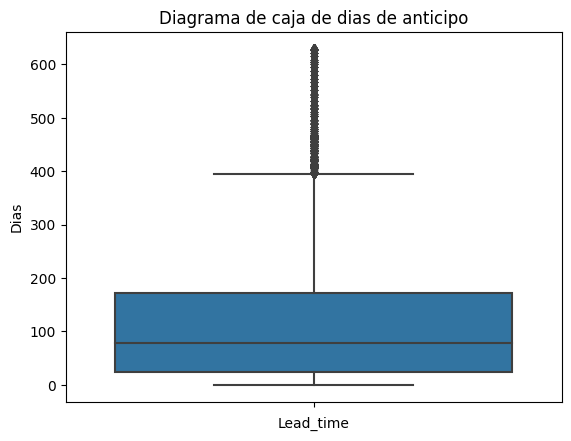

In [ ]:
sns.boxplot(data=df_trabajo, y="lead_time")
plt.xlabel("Lead_time")
plt.ylabel("Dias")
plt.title("Diagrama de caja de dias de anticipo")
plt.show()

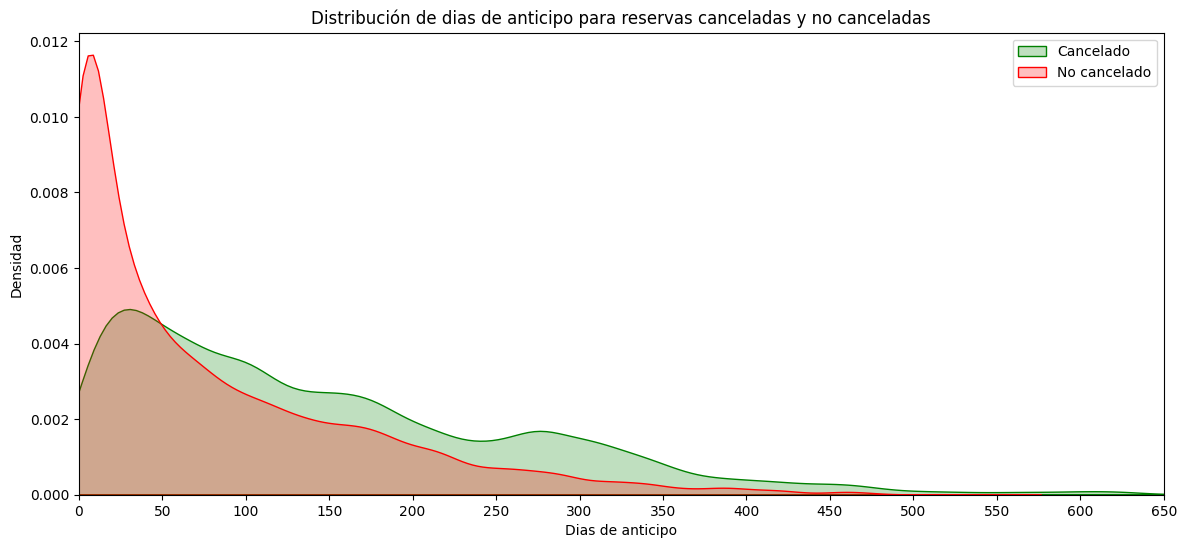

In [ ]:
df_cancelled = df[df['is_canceled'] == 1]
df_not_cancelled = df[df['is_canceled'] == 0]

fig, ax = plt.subplots(figsize=(14, 6))

# Plot de la densidad de ADR para reservas canceladas y no canceladas
sns.kdeplot(df_cancelled['lead_time'], fill=True, color="g", label="Cancelado")
sns.kdeplot(df_not_cancelled['lead_time'], fill=True, color="r", label="No cancelado")

# Configuración de la gráfica
plt.title("Distribución de dias de anticipo para reservas canceladas y no canceladas")
plt.xlabel("Dias de anticipo")
plt.ylabel("Densidad")
plt.legend(loc="upper right")

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(50)) #Intervalo de x


# Mostrar la gráfica
plt.xlim(0, 650)
plt.show()

Podemos notar que cuanto menos dias de anticipo tenga la reserva menos chance tiene de cancelar.

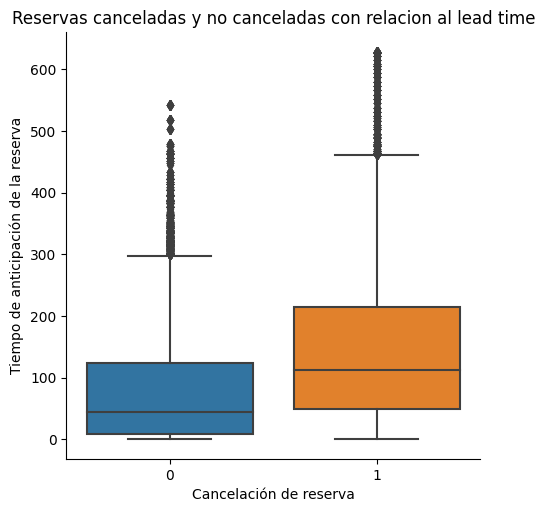

In [ ]:
sns.catplot(x="is_canceled", y="lead_time", kind="box", data=df_trabajo)

plt.xlabel("Cancelación de reserva")
plt.ylabel("Tiempo de anticipación de la reserva")
plt.title("Reservas canceladas y no canceladas con relacion al lead time")

plt.show()


#### Arrival Date Year

Los años de este dataset son 2015, 2016 y 2017. 

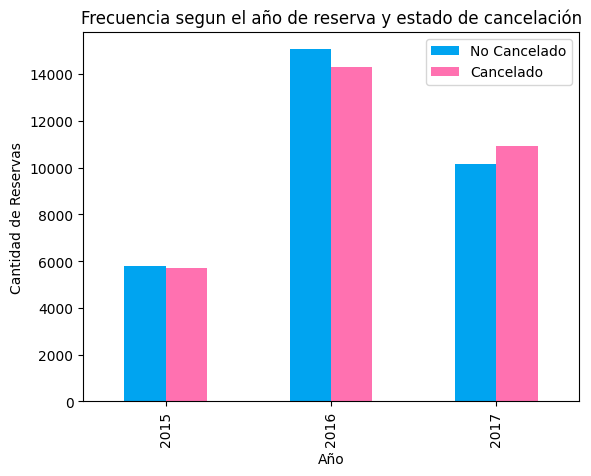

In [ ]:
pivot_table = pd.pivot_table(df, index="arrival_date_year", columns="is_canceled", values="id", aggfunc="count", fill_value=0)
pivot_table.columns = ["No Cancelado", "Cancelado"]


grf = pivot_table.plot.bar(color=["#00a4f0", "#ff71b0"], title="Frecuencia segun el año de reserva y estado de cancelación",xlabel='Año',ylabel='Cantidad de Reservas')

Podemos observar que la mayor cantidad de reservas fueron hechas en 2016, seguida de 2017 y por ultimo con una cantidad mucho menor 2015. Pero realmente no se puede notar en ninguna etapa una diferencia notable que nos permita observar un patron para decidir si una reserva se cancelara o no dependiendo del año.

#### Arrival Date Week Number

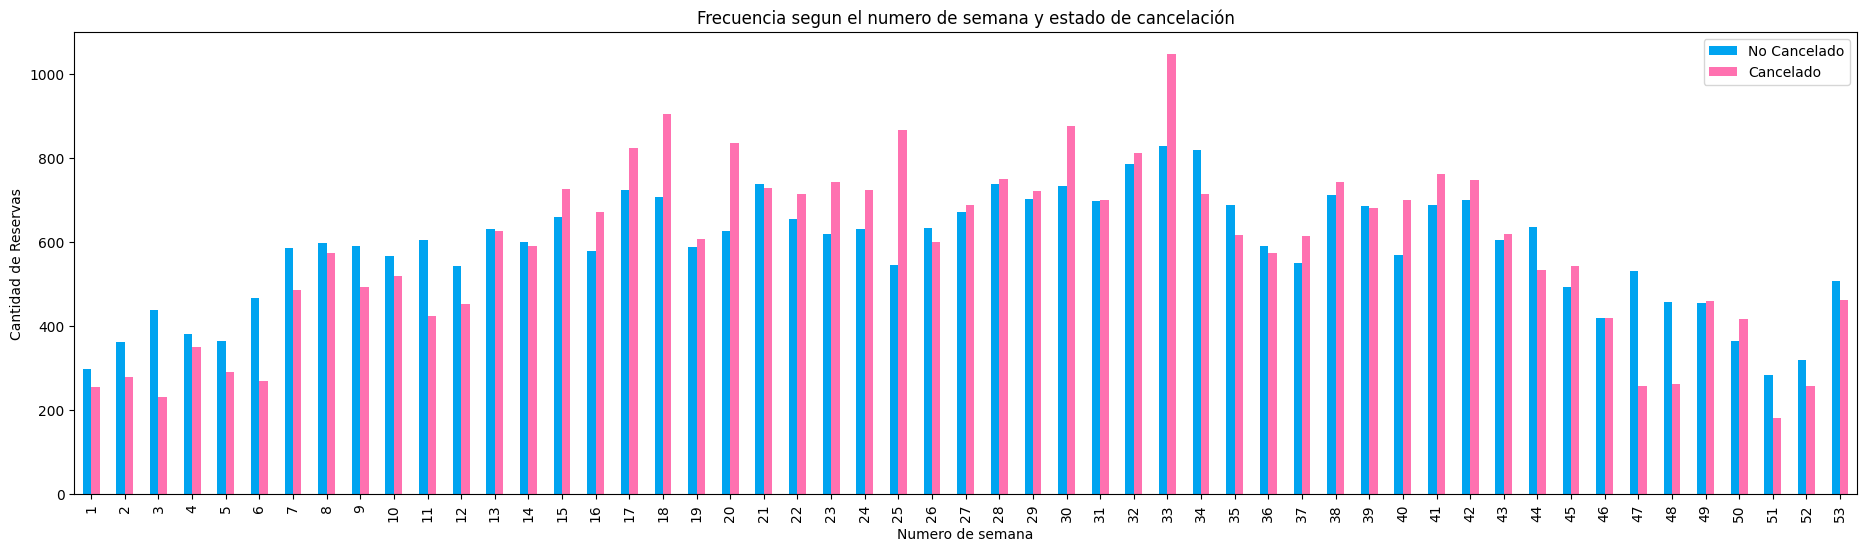

In [ ]:
pivot_table = pd.pivot_table(df, index="arrival_date_week_number", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]

fig, ax = plt.subplots(figsize=(23, 6)) # Set the figure size

grf = pivot_table.plot.bar(ax=ax, stacked=False,color=["#00a4f0", "#ff71b0"], title="Frecuencia segun el numero de semana y estado de cancelación",xlabel='Numero de semana',ylabel='Cantidad de Reservas')

#### Arrival Date Day of Month

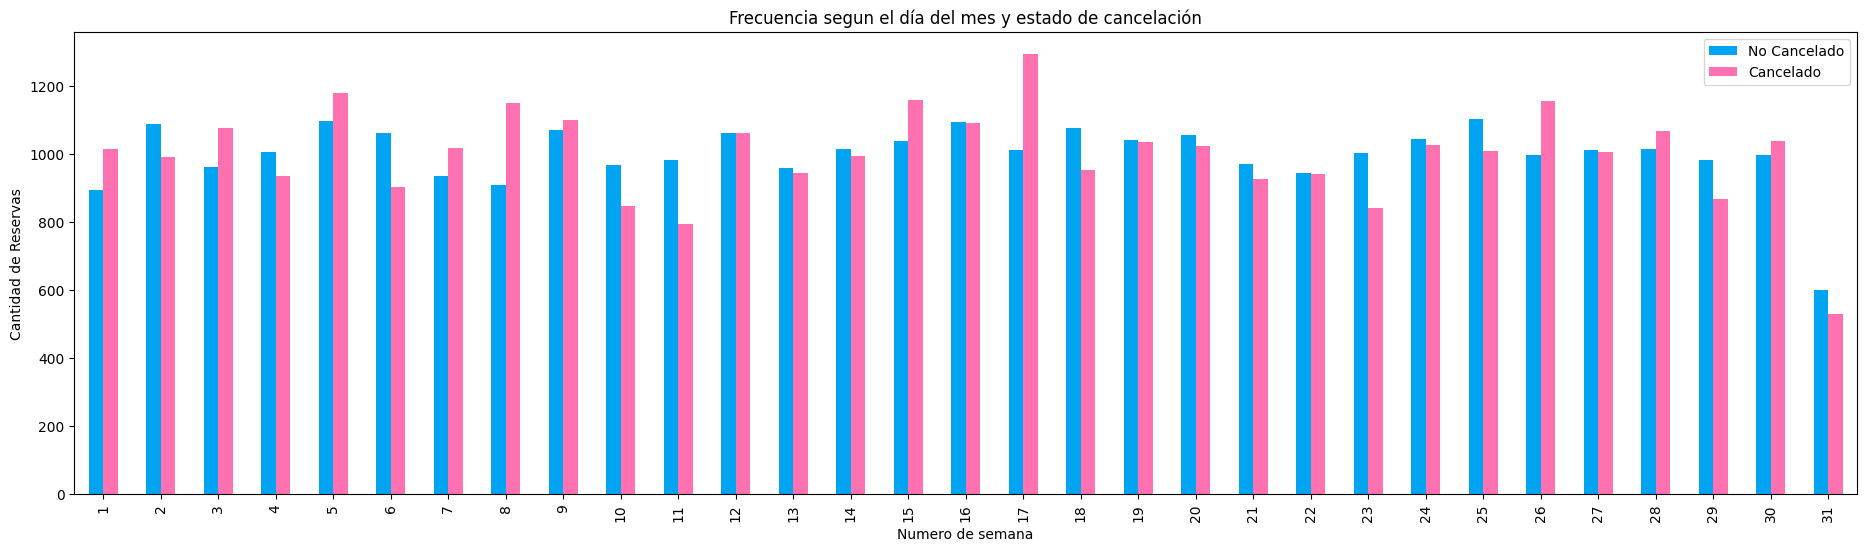

In [ ]:
pivot_table = pd.pivot_table(df, index="arrival_date_day_of_month", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]

fig, ax = plt.subplots(figsize=(23, 6)) # Set the figure size

grf = pivot_table.plot.bar(ax=ax, stacked=False,color=["#00a4f0", "#ff71b0"], title="Frecuencia segun el día del mes y estado de cancelación",xlabel='Numero de semana',ylabel='Cantidad de Reservas')

#### Stay In Weekend Nights

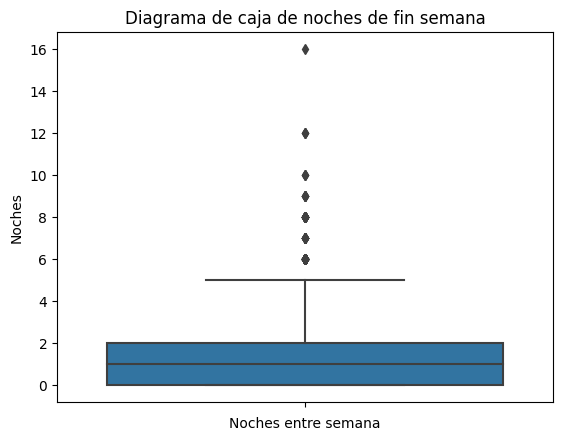

In [ ]:
sns.boxplot(data=df_trabajo, y="stays_in_weekend_nights")
plt.xlabel("Noches entre semana")
plt.ylabel("Noches")
plt.title("Diagrama de caja de noches de fin semana")
plt.show()

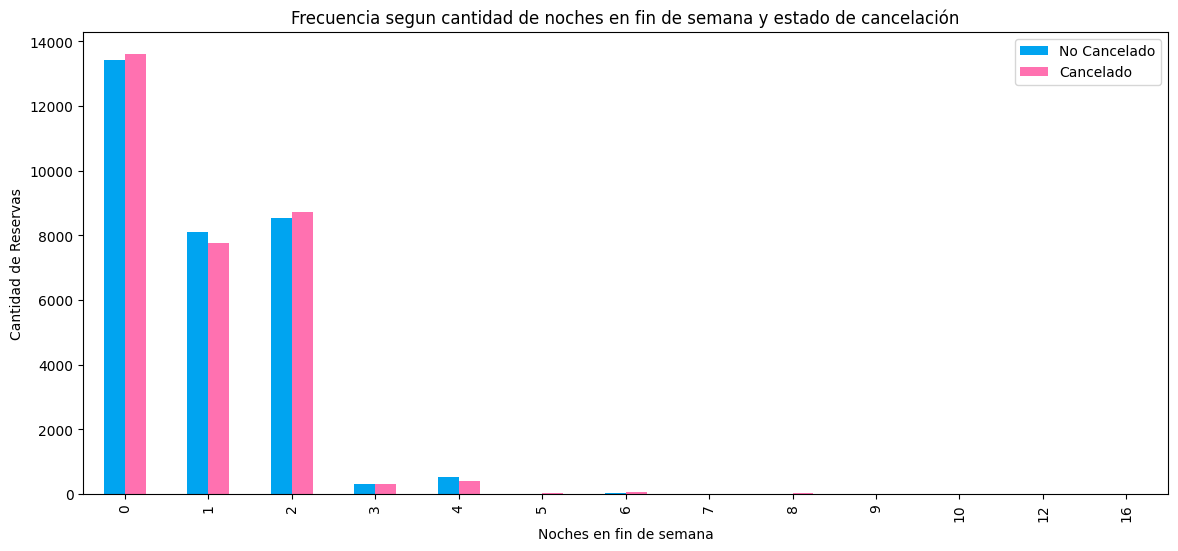

In [ ]:
pivot_table = pd.pivot_table(df, index="stays_in_weekend_nights", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]

fig, ax = plt.subplots(figsize=(14, 6)) # Set the figure size

grf = pivot_table.plot.bar(ax=ax, stacked=False,color=["#00a4f0", "#ff71b0"], title="Frecuencia segun cantidad de noches en fin de semana y estado de cancelación",xlabel='Noches en fin de semana',ylabel='Cantidad de Reservas')

Podemos observar, que la mayoria de reservas posee entre 0 y 2 días en el fin de semana, lo cual significa que solo pasan un fin de semana o ni siquiera uno. Esto es lógico, ya que para tener mas de 2 días, la reserva debe durar mínimo 10 días, lo cual es una estadía larga para un hotel. 

#### Stay In Week Nights

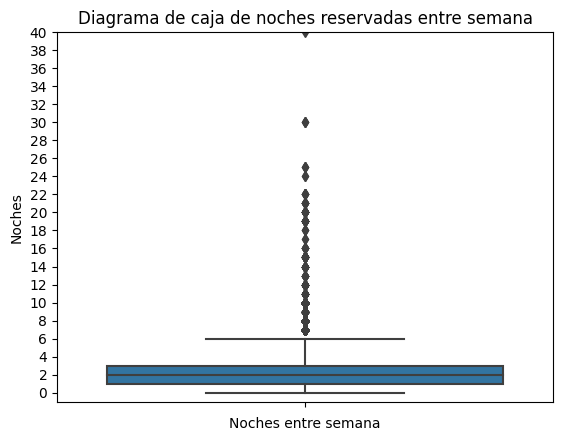

In [ ]:
sns.boxplot(data=df_trabajo, y="stays_in_week_nights")
plt.xlabel("Noches entre semana")
plt.ylabel("Noches")
plt.title("Diagrama de caja de noches reservadas entre semana")
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(2)) #Intervalo de y
plt.ylim(-1, 40)
plt.show()

La mayoria de reservas son entre 1 y 3 noches. Siendo las reservas mayores a 6 valores atipicos en especial habiendo una reserva con 40 noches

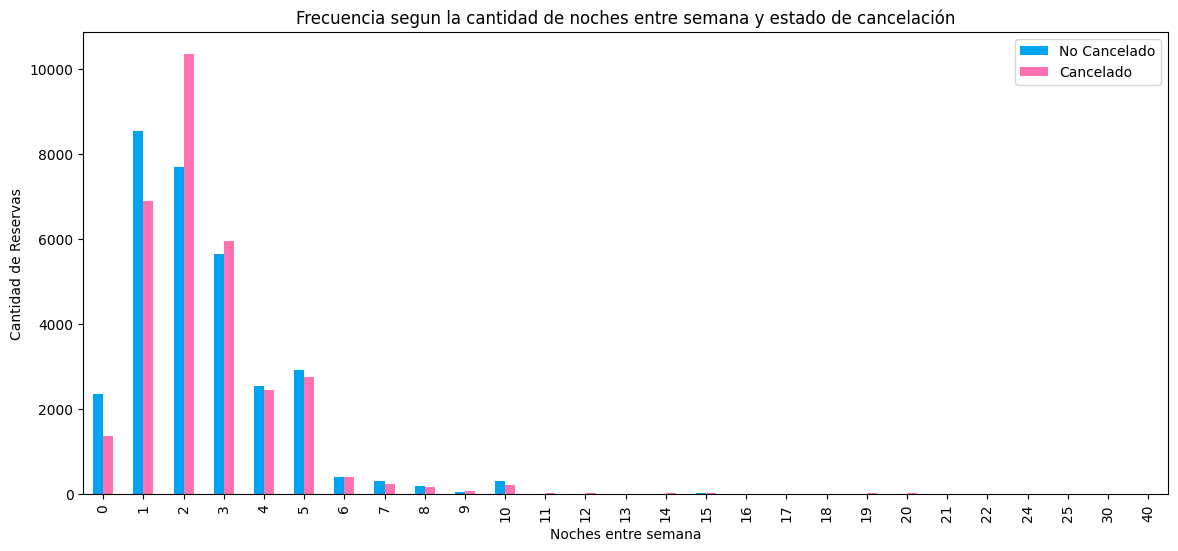

In [ ]:
pivot_table = pd.pivot_table(df, index="stays_in_week_nights", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]

fig, ax = plt.subplots(figsize=(14, 6)) # Set the figure size

grf = pivot_table.plot.bar(ax=ax, stacked=False,color=["#00a4f0", "#ff71b0"], title="Frecuencia segun la cantidad de noches entre semana y estado de cancelación",xlabel='Noches entre semana',ylabel='Cantidad de Reservas')

En el grafico podemos notar que la reservas que son con cero o una noche parecen ser menos canceladas, mientras que la reservas con 2 noches de semana parace ser las mas cancelada. Despues las reservas parecen ser canceladas y no por igual, a excepcion del grupo de 10 noches que parece que se cancelan menos de lo normal

Algo que despues podemos fijarnos es si la reservas con 0 noches es solo por el dia o se quedan el fin de semana y como afecta eso a la cancelacion de la reserva

#### Adults, children y babies

Mediante el análisis de los gráficos de tipo Box-Plot vamos a intentar identificar outliers univariados.

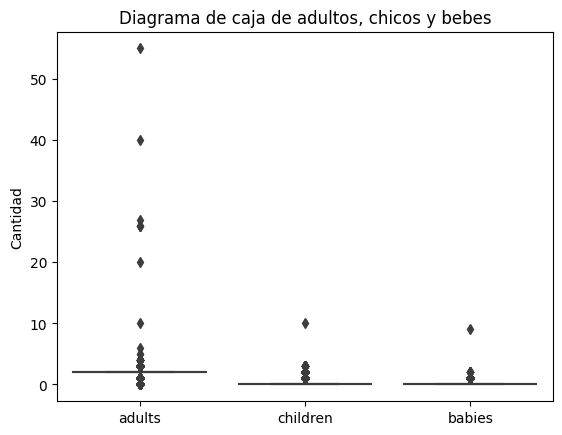

In [ ]:
sns.boxplot(data=df_trabajo[["adults","children","babies"]])
plt.ylabel("Cantidad")
plt.title("Diagrama de caja de adultos, chicos y bebes")
plt.show()

Viendo el grafico podemos notar que las reservas suelen tener en su mayoria la misma cantidad de adultos,chicos y bebes

Depues analisisando la distribucion con el target

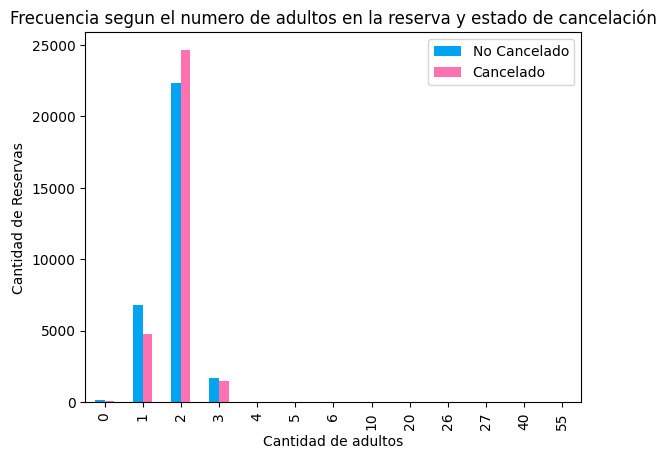

In [ ]:
pivot_table = pd.pivot_table(df, index="adults", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]

grf = pivot_table.plot.bar(stacked=False,color=["#00a4f0", "#ff71b0"], title="Frecuencia segun el numero de adultos en la reserva y estado de cancelación",xlabel='Cantidad de adultos',ylabel='Cantidad de Reservas')

La gran mayoria de reservas se hacen con 2 adultos con mas cancelaciones, seguido de reservas con 1 adulto que se suelen no ser cancelados

Tambien podemos ver que hay una cantidad de reservas con 0 adultos, aunque es posible en la gran mayotia de paises no se puede reservar sin ser mayor.

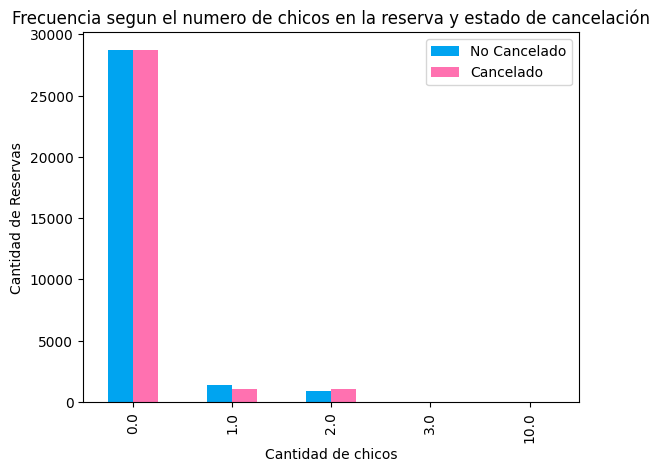

In [ ]:
pivot_table = pd.pivot_table(df, index="children", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]
grf = pivot_table.plot.bar(stacked=False,color=["#00a4f0", "#ff71b0"], title="Frecuencia segun el numero de chicos en la reserva y estado de cancelación",xlabel='Cantidad de chicos',ylabel='Cantidad de Reservas')

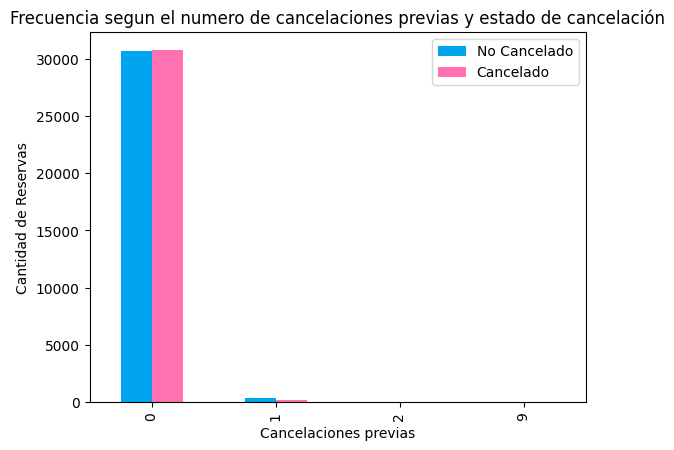

In [ ]:
pivot_table = pd.pivot_table(df, index="babies", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]
grf = pivot_table.plot.bar(stacked=False,color=["#00a4f0", "#ff71b0"], title="Frecuencia segun el numero de cancelaciones previas y estado de cancelación",xlabel='Cancelaciones previas',ylabel='Cantidad de Reservas')

#### Cancelaciones Previas

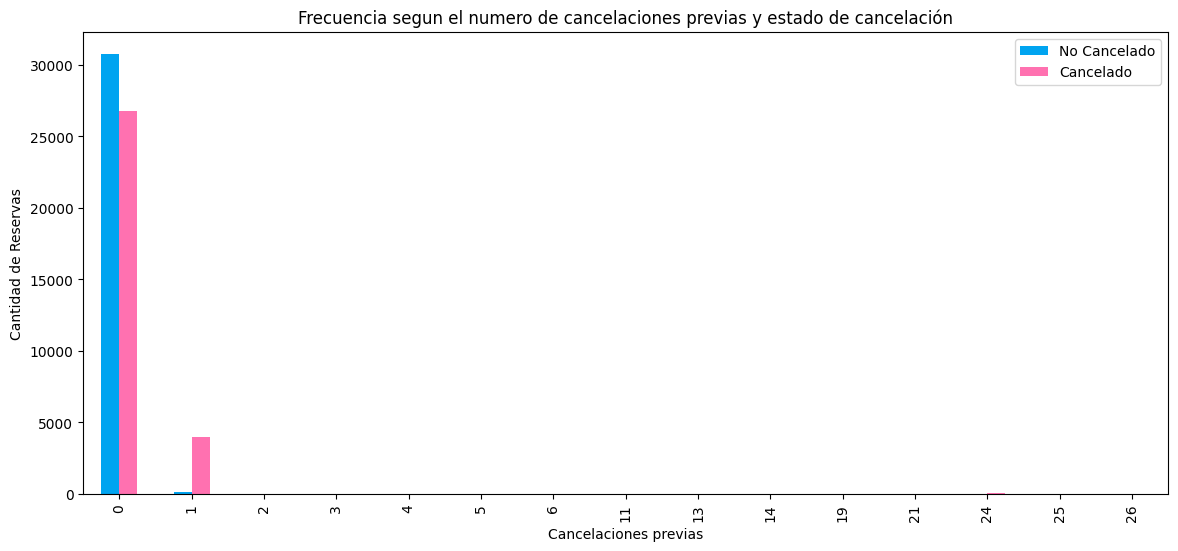

In [ ]:
pivot_table = pd.pivot_table(df, index="previous_cancellations", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]

fig, ax = plt.subplots(figsize=(14, 6)) # Set the figure size

grf = pivot_table.plot.bar(ax=ax, stacked=False,color=["#00a4f0", "#ff71b0"], title="Frecuencia segun el numero de cancelaciones previas y estado de cancelación",xlabel='Cancelaciones previas',ylabel='Cantidad de Reservas')

La mayoria de las reservas no tienen cancelaciones previas y en ellas se suelen cancelar menos, mientras que las reservas que tienen una cancelacion previas son canceladas casi que siempre

#### Previous Bookings not Canceled 

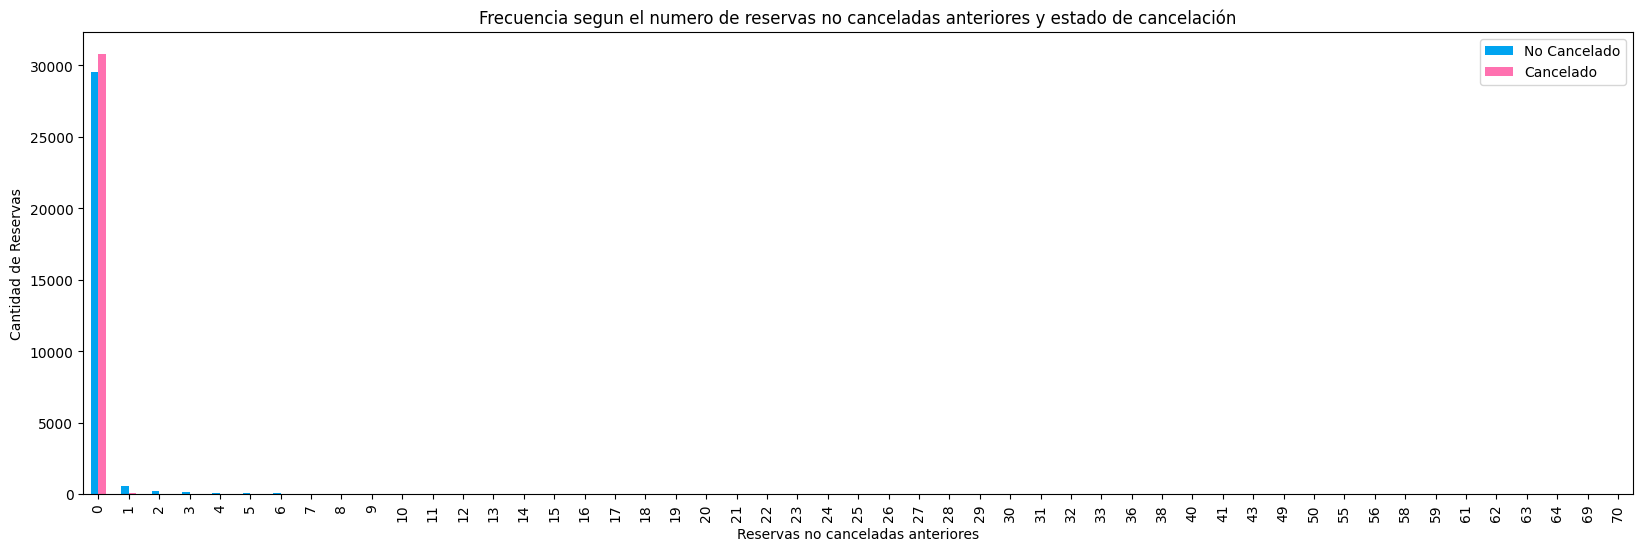

In [ ]:
pivot_table = pd.pivot_table(df, index="previous_bookings_not_canceled", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]

fig, ax = plt.subplots(figsize=(20, 6)) # Set the figure size
grf = pivot_table.plot.bar(ax=ax, stacked=False,color=["#00a4f0", "#ff71b0"], title="Frecuencia segun el numero de reservas no canceladas anteriores y estado de cancelación",xlabel='Reservas no canceladas anteriores',ylabel='Cantidad de Reservas')

#### Booking changes

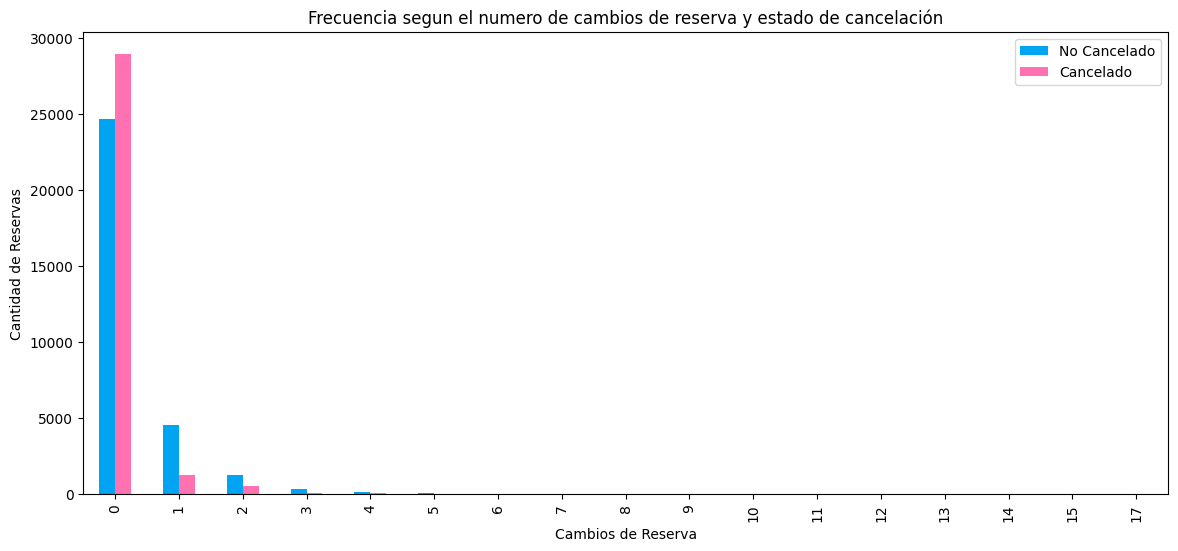

In [ ]:
pivot_table = pd.pivot_table(df, index="booking_changes", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]

fig, ax = plt.subplots(figsize=(14, 6)) # Set the figure size

grf = pivot_table.plot.bar(ax=ax, stacked=False,color=["#00a4f0", "#ff71b0"], title="Frecuencia segun el numero de cambios de reserva y estado de cancelación",xlabel='Cambios de Reserva',ylabel='Cantidad de Reservas')

#### Days in waiting list

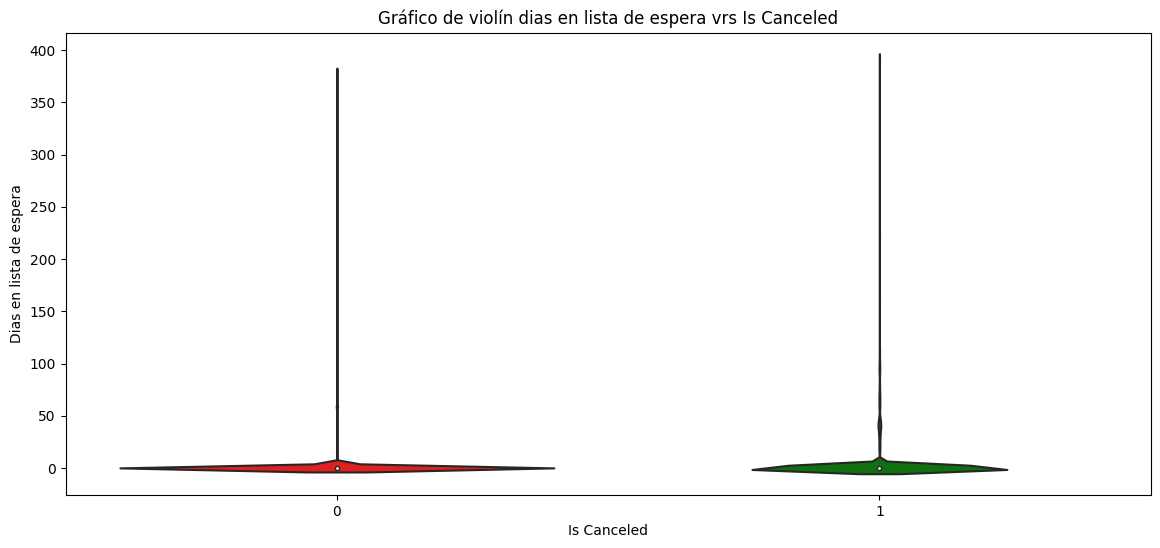

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
ax = sns.violinplot(x="is_canceled", y="days_in_waiting_list", data=df_trabajo,palette=["r", "g"]).set(title="Gráfico de violín dias en lista de espera vrs Is Canceled",xlabel='Is Canceled',ylabel='Dias en lista de espera') 

#### ADR

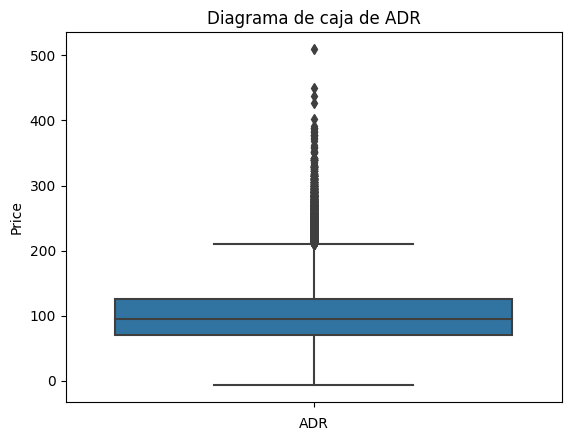

In [ ]:
sns.boxplot(data=df_trabajo, y=df_trabajo["adr"])
plt.xlabel("ADR")
plt.ylabel("Price")
plt.title("Diagrama de caja de ADR")
plt.show()

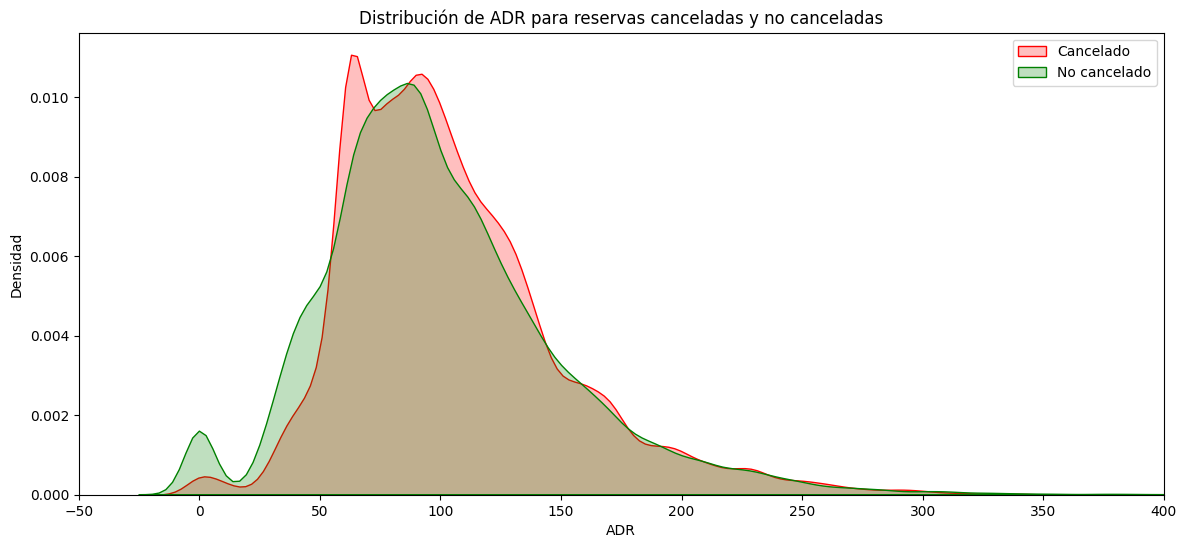

In [ ]:
df_cancelled = df[df['is_canceled'] == 1]
df_not_cancelled = df[df['is_canceled'] == 0]

fig, ax = plt.subplots(figsize=(14, 6))

# Plot de la densidad de ADR para reservas canceladas y no canceladas
sns.kdeplot(df_cancelled['adr'], fill=True, color="r", label="Cancelado")
sns.kdeplot(df_not_cancelled['adr'], fill=True, color="g", label="No cancelado")

# Configuración de la gráfica
plt.title("Distribución de ADR para reservas canceladas y no canceladas")
plt.xlabel("ADR")
plt.ylabel("Densidad")
plt.legend(loc="upper right")

# Mostrar la gráfica
plt.xlim(-50, 400)
plt.show()

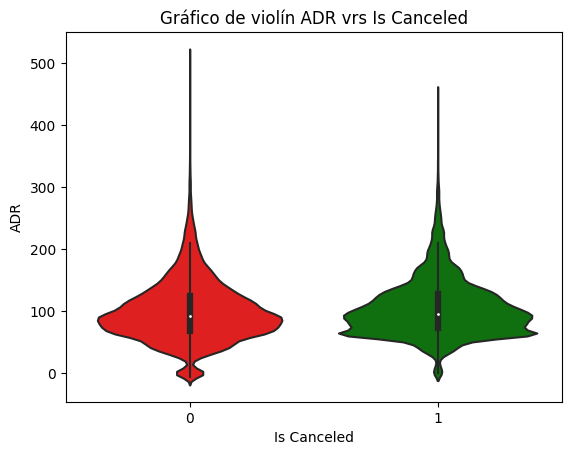

In [ ]:
ax = sns.violinplot(x="is_canceled", y="adr", data=df_trabajo,palette=["r", "g"]).set(title="Gráfico de violín ADR vrs Is Canceled",xlabel='Is Canceled',ylabel='ADR') 

#### Parking space

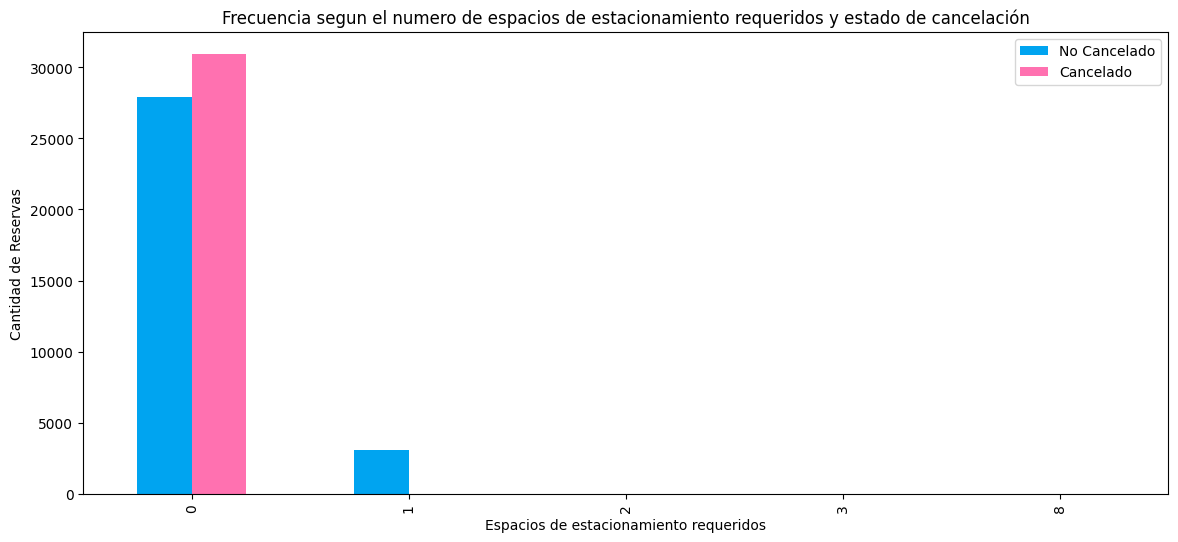

In [ ]:
pivot_table = pd.pivot_table(df, index="required_car_parking_spaces", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]

fig, ax = plt.subplots(figsize=(14, 6)) # Set the figure size

grf = pivot_table.plot.bar(ax=ax, stacked=False,color=["#00a4f0", "#ff71b0"], title="Frecuencia segun el numero de espacios de estacionamiento requeridos y estado de cancelación",xlabel='Espacios de estacionamiento requeridos',ylabel='Cantidad de Reservas')

La gran mayoria de las reservas no se pide estacionamiento y de ellas mas son mas cancelada, las reservas ya con un espacio de estacionamiento requerido cancelan en mucho menor medida

#### Total special request

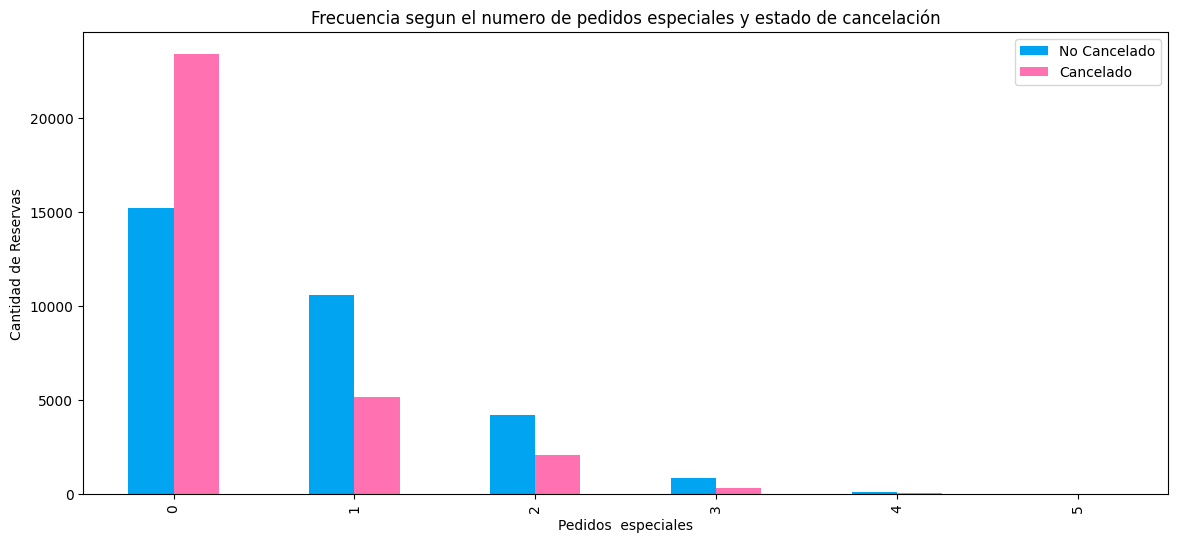

In [ ]:
pivot_table = pd.pivot_table(df, index="total_of_special_requests", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]

fig, ax = plt.subplots(figsize=(14, 6)) # Set the figure size

grf = pivot_table.plot.bar(ax=ax, stacked=False,color=["#00a4f0", "#ff71b0"], title="Frecuencia segun el numero de pedidos especiales y estado de cancelación",xlabel='Pedidos  especiales',ylabel='Cantidad de Reservas')

Podemos notar que cuando las reservas tienen un pedido especial menos chance tiene de ser cancelada y cuando no tienen es al revez.

---

### Variables categoricas

#### Hotel

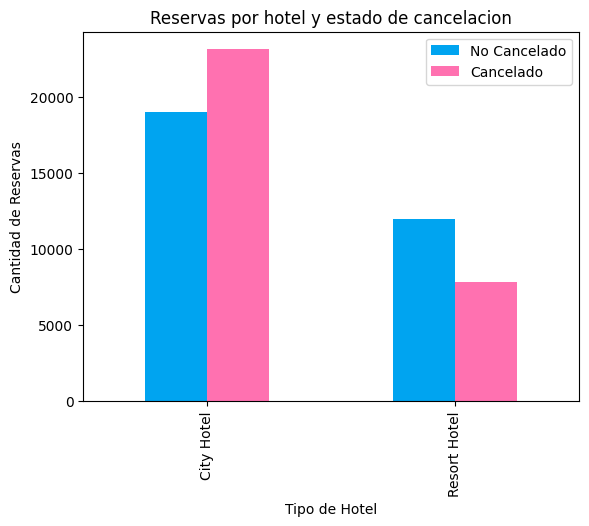

In [ ]:
pivot_table = pd.pivot_table(df, index="hotel", columns="is_canceled", values="id", aggfunc="count", fill_value=0)
pivot_table.columns = ["No Cancelado", "Cancelado"]


grf = pivot_table.plot.bar(color=["#00a4f0", "#ff71b0"], title="Reservas por hotel y estado de cancelacion",xlabel='Tipo de Hotel',ylabel='Cantidad de Reservas')

#### Arraival Date Month

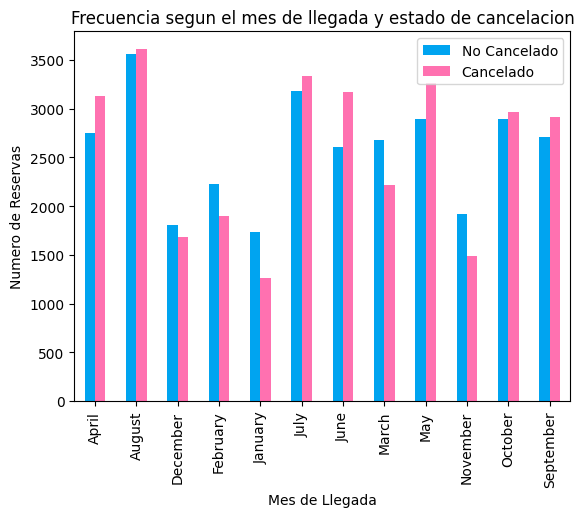

In [ ]:
pivot_table = pd.pivot_table(df, index="arrival_date_month", columns="is_canceled", values="id", aggfunc="count", fill_value=0)
pivot_table.columns = ["No Cancelado", "Cancelado"]


grf = pivot_table.plot.bar(color=["#00a4f0", "#ff71b0"], title="Frecuencia segun el mes de llegada y estado de cancelacion",xlabel='Mes de Llegada',ylabel='Numero de Reservas') 

#### Meal

Los posibles valores de meal 

- Undefined/SC – sin comidad
- BB – Desayuno y Cama
- HB – Desayuno y otra comida
- FB – Todas las comidas del dia

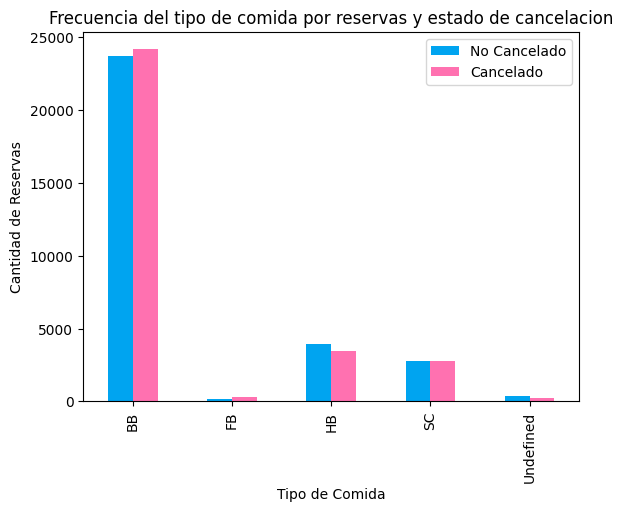

In [ ]:
pivot_table = pd.pivot_table(df, index="meal", columns="is_canceled", values="id", aggfunc="count", fill_value=0)
pivot_table.columns = ["No Cancelado", "Cancelado"]

grf = pivot_table.plot.bar(color=["#00a4f0", "#ff71b0"],title="Frecuencia del tipo de comida por reservas y estado de cancelacion",xlabel='Tipo de Comida',ylabel='Cantidad de Reservas')


Podemos notar que gran parte de las reservas son solo con desayuno y que no hay gran diferencia entre las reservas canceladas y las no canceladas por el tipo de comida de la reserva

#### Country

In [ ]:
df_trabajo["country"].value_counts()

PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
       ...  
HND        1
FJI        1
LIE        1
ATA        1
RWA        1
Name: country, Length: 149, dtype: int64

#### Market segment

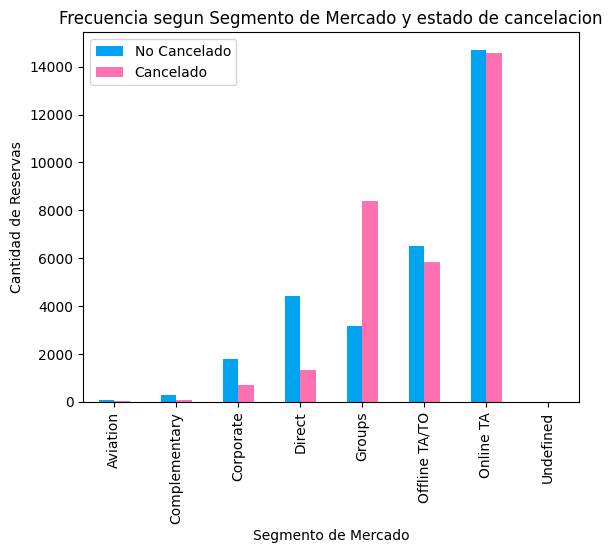

In [ ]:
pivot_table = pd.pivot_table(df, index="market_segment", columns="is_canceled", values="id", aggfunc="count", fill_value=0)
pivot_table.columns = ["No Cancelado", "Cancelado"]

grf = pivot_table.plot.bar(color=["#00a4f0", "#ff71b0"],title="Frecuencia segun Segmento de Mercado y estado de cancelacion",xlabel='Segmento de Mercado',ylabel='Cantidad de Reservas') 

#### Distribution Channel

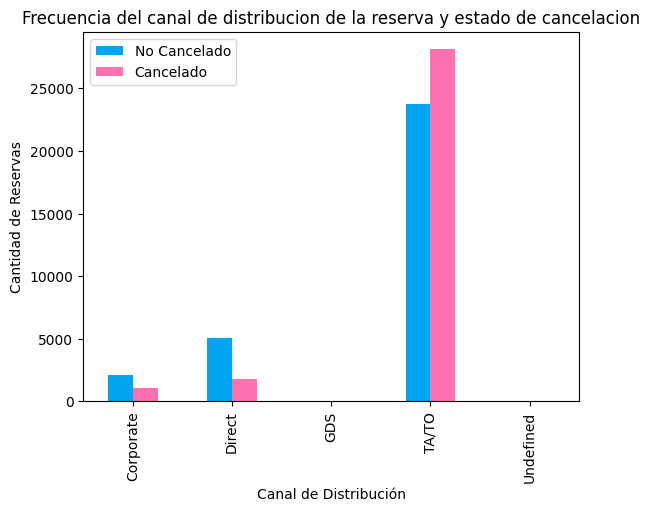

In [ ]:
pivot_table = pd.pivot_table(df, index="distribution_channel", columns="is_canceled", values="id", aggfunc="count", fill_value=0)
pivot_table.columns = ["No Cancelado", "Cancelado"]

grf = pivot_table.plot.bar(color=["#00a4f0", "#ff71b0"],title="Frecuencia del canal de distribucion de la reserva y estado de cancelacion",xlabel='Canal de Distribución',ylabel='Cantidad de Reservas') 

#### Is repeated guest

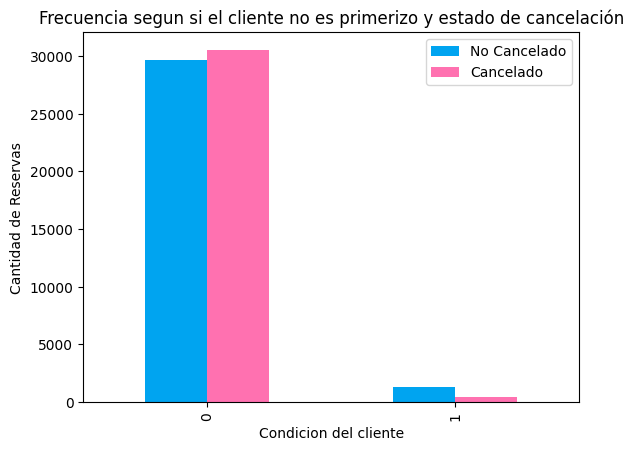

In [ ]:
pivot_table = pd.pivot_table(df, index="is_repeated_guest", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]


grf = pivot_table.plot.bar(stacked=False,color=["#00a4f0", "#ff71b0"], title="Frecuencia segun si el cliente no es primerizo y estado de cancelación",xlabel='Condicion del cliente',ylabel='Cantidad de Reservas')
plt.show()

#### Reserved room type

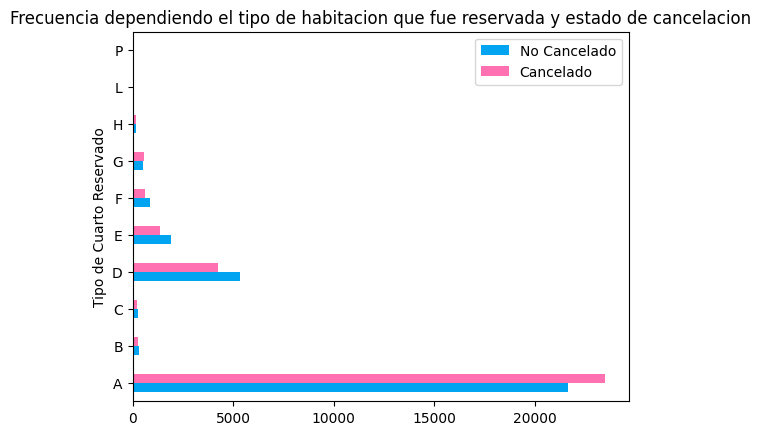

In [ ]:
pivot_table = pd.pivot_table(df, index="reserved_room_type", columns="is_canceled", values="id", aggfunc="count", fill_value=0)
pivot_table.columns = ["No Cancelado", "Cancelado"]


grf = pivot_table.plot.barh(color=["#00a4f0", "#ff71b0"],title="Frecuencia dependiendo el tipo de habitacion que fue reservada y estado de cancelacion",xlabel='Tipo de Cuarto Reservado',ylabel='Cantidad de Reservas')  

#### Assigned Room Type

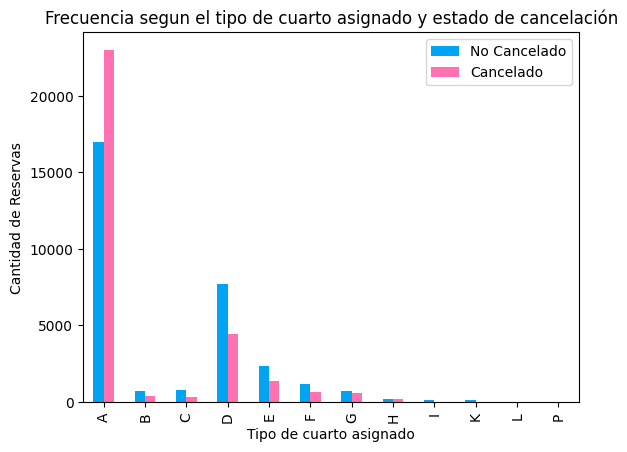

In [ ]:
pivot_table = pd.pivot_table(df, index="assigned_room_type", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]

grf = pivot_table.plot.bar(stacked=False,color=["#00a4f0", "#ff71b0"], title="Frecuencia segun el tipo de cuarto asignado y estado de cancelación",xlabel='Tipo de cuarto asignado',ylabel='Cantidad de Reservas')

#### Deposit Type

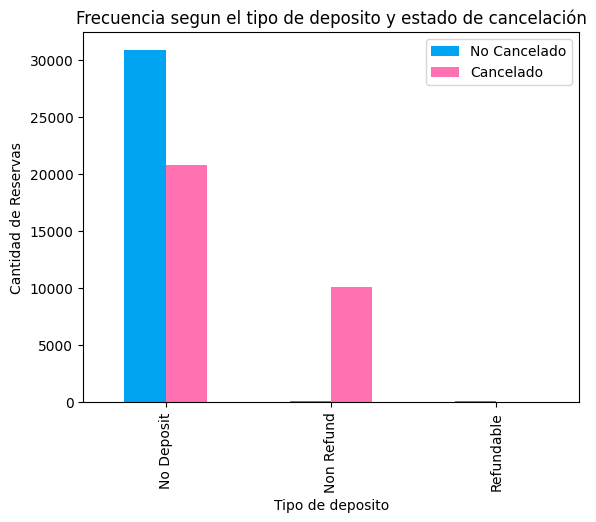

In [ ]:
pivot_table = pd.pivot_table(df, index="deposit_type", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]

grf = pivot_table.plot.bar(stacked=False,color=["#00a4f0", "#ff71b0"], title="Frecuencia segun el tipo de deposito y estado de cancelación",xlabel='Tipo de deposito',ylabel='Cantidad de Reservas')

Se puede notar una gran diferencia entre las reservas cancelada en las reservas sin deposito(cancelan menos) y las no reembolsable(cancelan mas). No hay una cantidad significativas de reservas reembolsable pero aparenta que se suelen no cancelar

#### Agent **TODO**

#### Company **TODO**

#### Customer Type

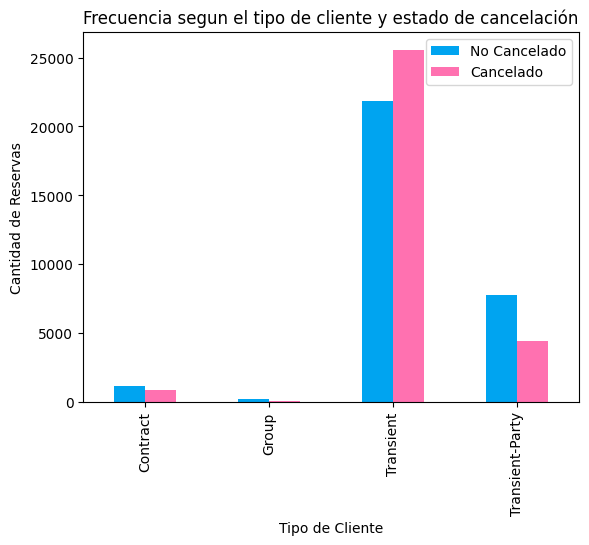

In [ ]:
pivot_table = pd.pivot_table(df, index="customer_type", columns="is_canceled", values="id", aggfunc="count", fill_value=0)
pivot_table.columns = ["No Cancelado", "Cancelado"]


grf = pivot_table.plot.bar(color=["#00a4f0", "#ff71b0"], title="Frecuencia segun el tipo de cliente y estado de cancelación",xlabel='Tipo de Cliente',ylabel='Cantidad de Reservas')

#### Is_canceled

Toma los valores 0 y 1 para indicar si se cancelo, siendo 1 el caso afirmativo.

In [ ]:
df_trabajo["is_canceled"].value_counts()

0    30972
1    30941
Name: is_canceled, dtype: int64

Notamos que en el dataframe hay una cantidad equilibrada de reservas canceladas y no canceladas

## Pairplots

(array([0. , 0.5, 1. , 1.5]),
 [Text(1, 0.0, '0.0'),
  Text(1, 0.5, '0.5'),
  Text(1, 1.0, '1.0'),
  Text(1, 1.5, '1.5')])

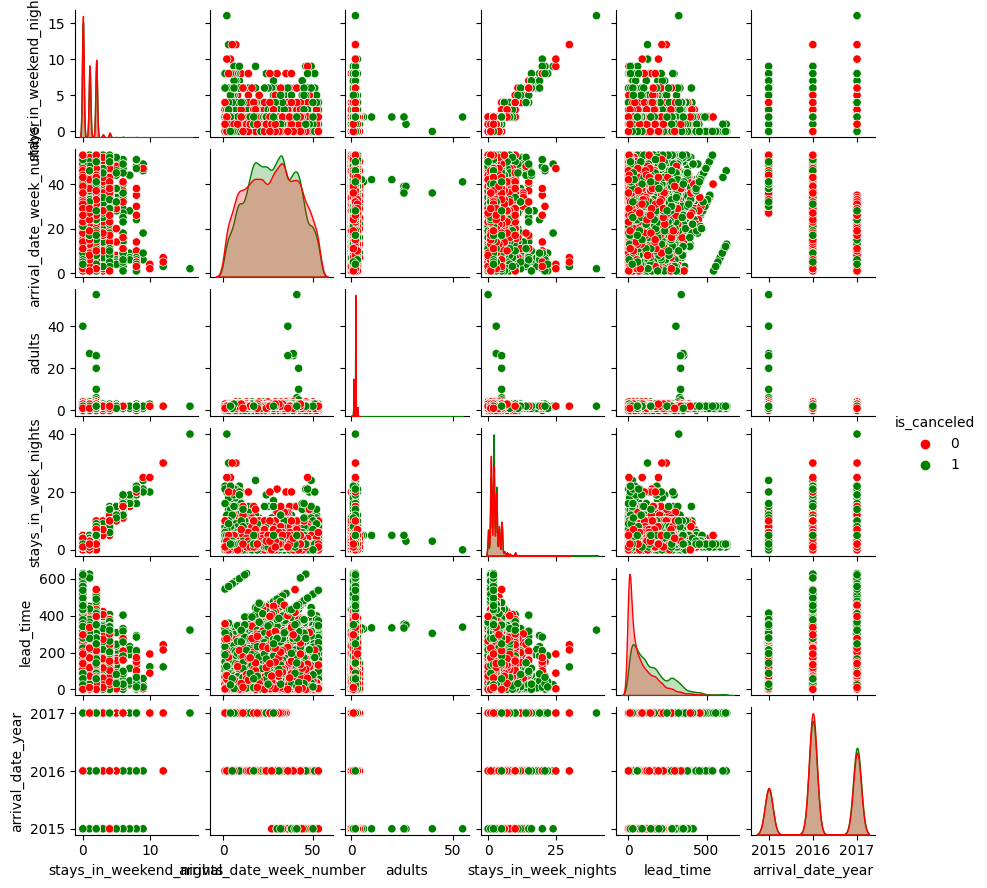

In [ ]:
sns.pairplot(data=df_trabajo, hue="is_canceled", vars={"lead_time","arrival_date_year","arrival_date_week_number","stays_in_weekend_nights","stays_in_week_nights","adults"}, palette=["r","g"],height=1.5)
plt.xticks(rotation=180)
plt.yticks(rotation=180)

(array([    0., 20000., 40000., 60000., 80000.]),
 [Text(1, 0.0, '0'),
  Text(1, 20000.0, '20000'),
  Text(1, 40000.0, '40000'),
  Text(1, 60000.0, '60000'),
  Text(1, 80000.0, '80000')])

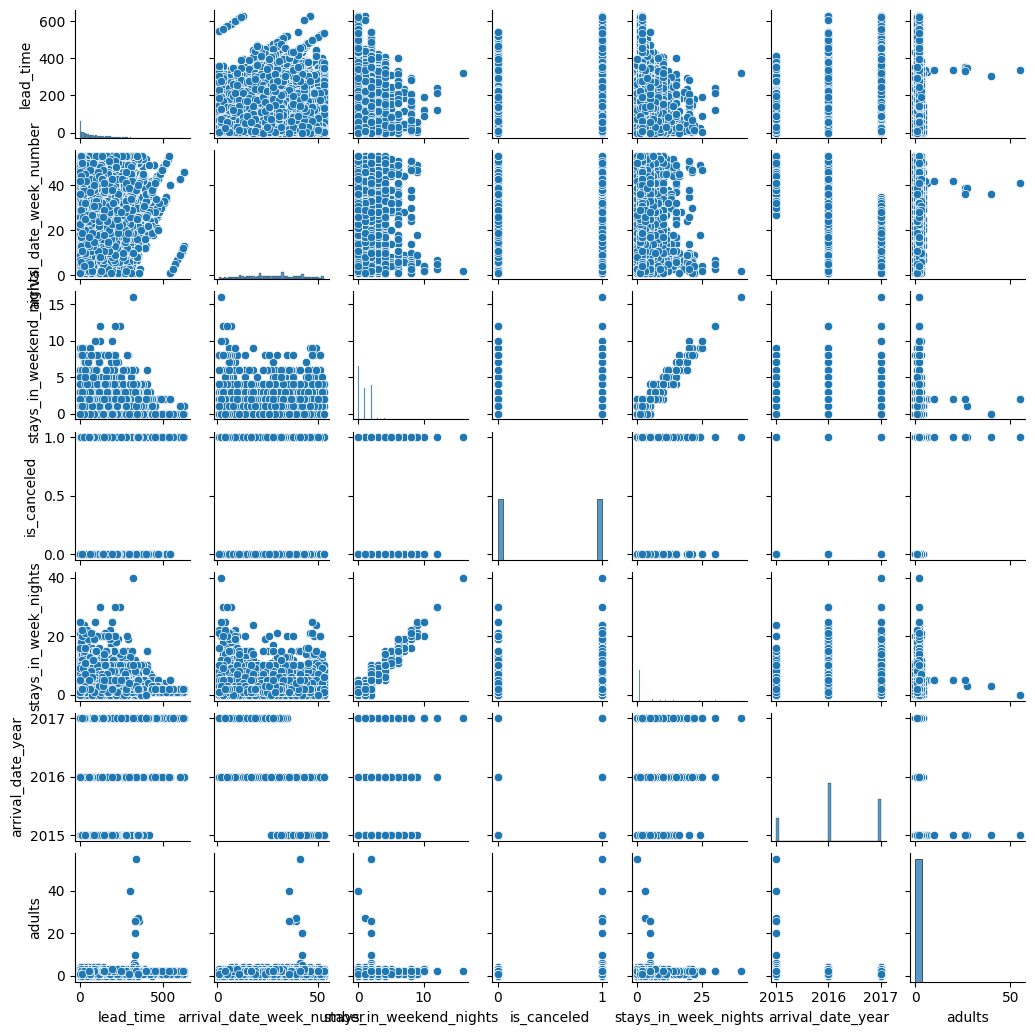

In [ ]:
sns.pairplot(data=df_trabajo, vars={"lead_time","arrival_date_year","arrival_date_week_number","stays_in_weekend_nights","stays_in_week_nights","adults","is_canceled"},height=1.5)
plt.xticks(rotation=180)
plt.yticks(rotation=180)

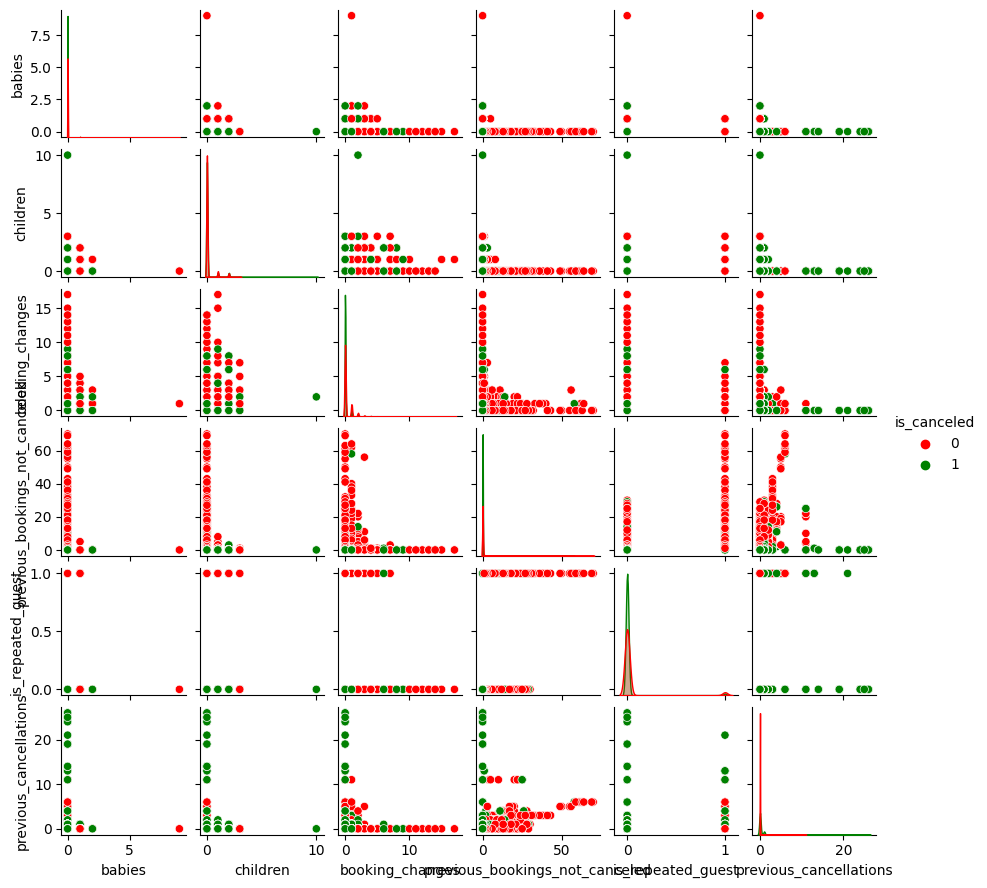

In [ ]:
sns.pairplot(data=df_trabajo, hue="is_canceled", vars={"children","babies","is_repeated_guest","previous_cancellations","previous_bookings_not_canceled","booking_changes"}, palette=["r","g"],height=1.5)

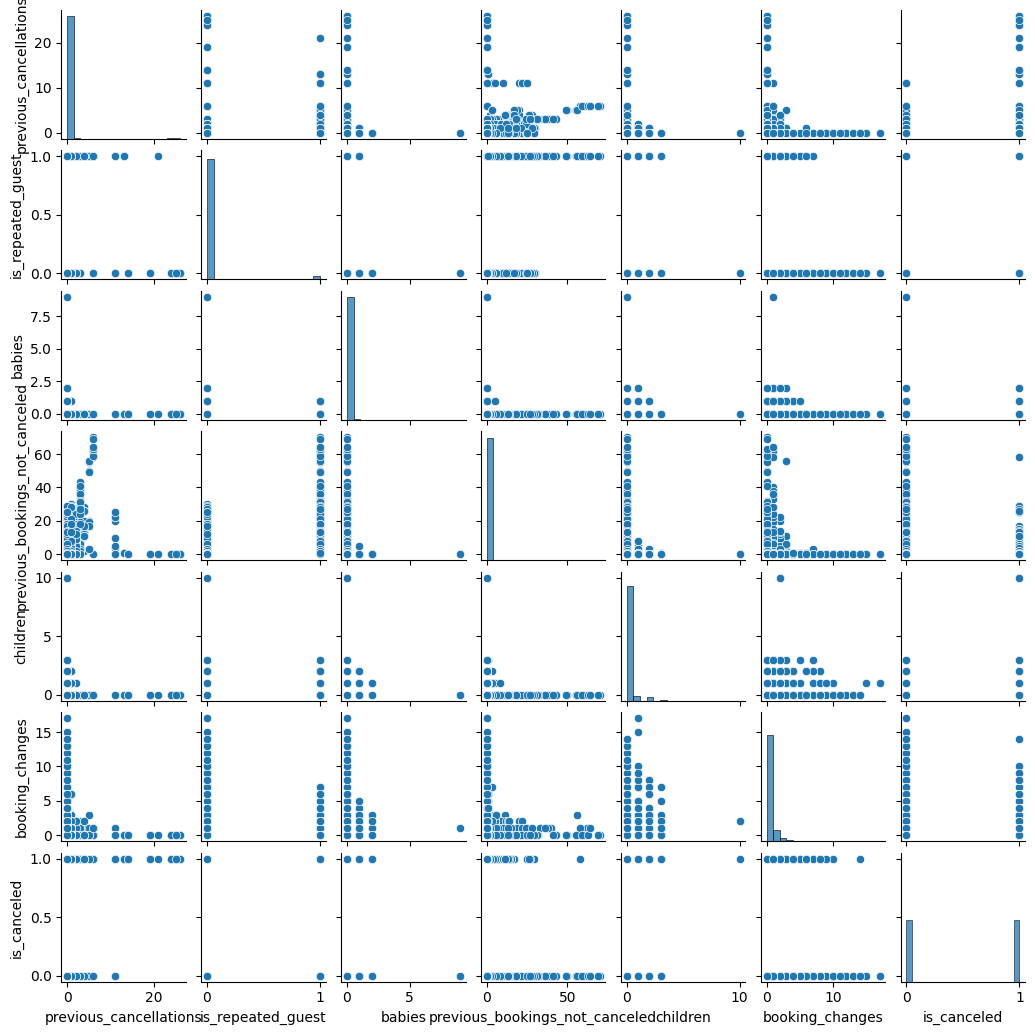

In [ ]:
sns.pairplot(data=df_trabajo, vars={"children","babies","is_repeated_guest","previous_cancellations","previous_bookings_not_canceled","booking_changes","is_canceled"},height=1.5)

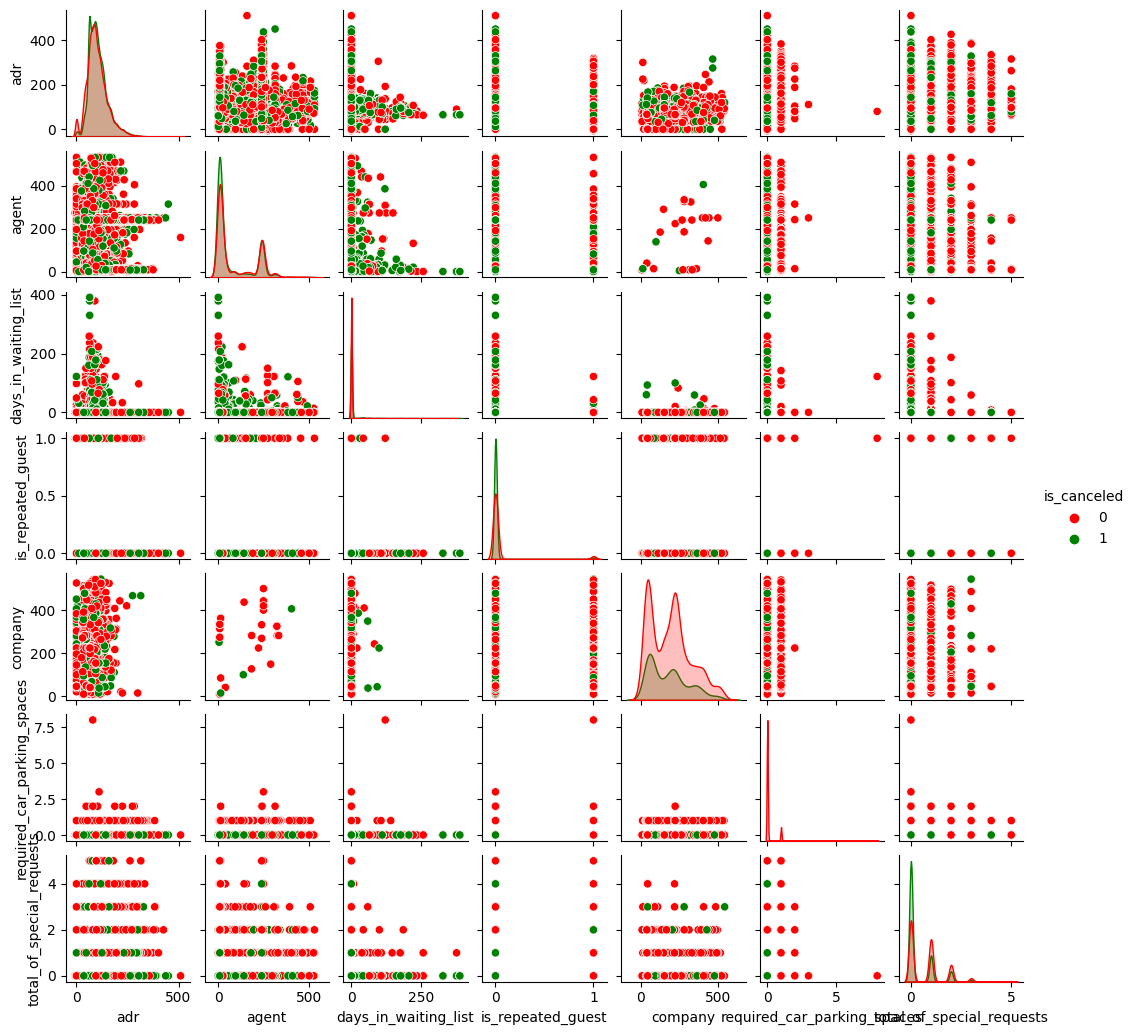

In [ ]:
sns.pairplot(data=df_trabajo, hue="is_canceled", vars={"agent","company","is_repeated_guest","days_in_waiting_list","adr","required_car_parking_spaces","total_of_special_requests"}, palette=["r","g"],height=1.5)

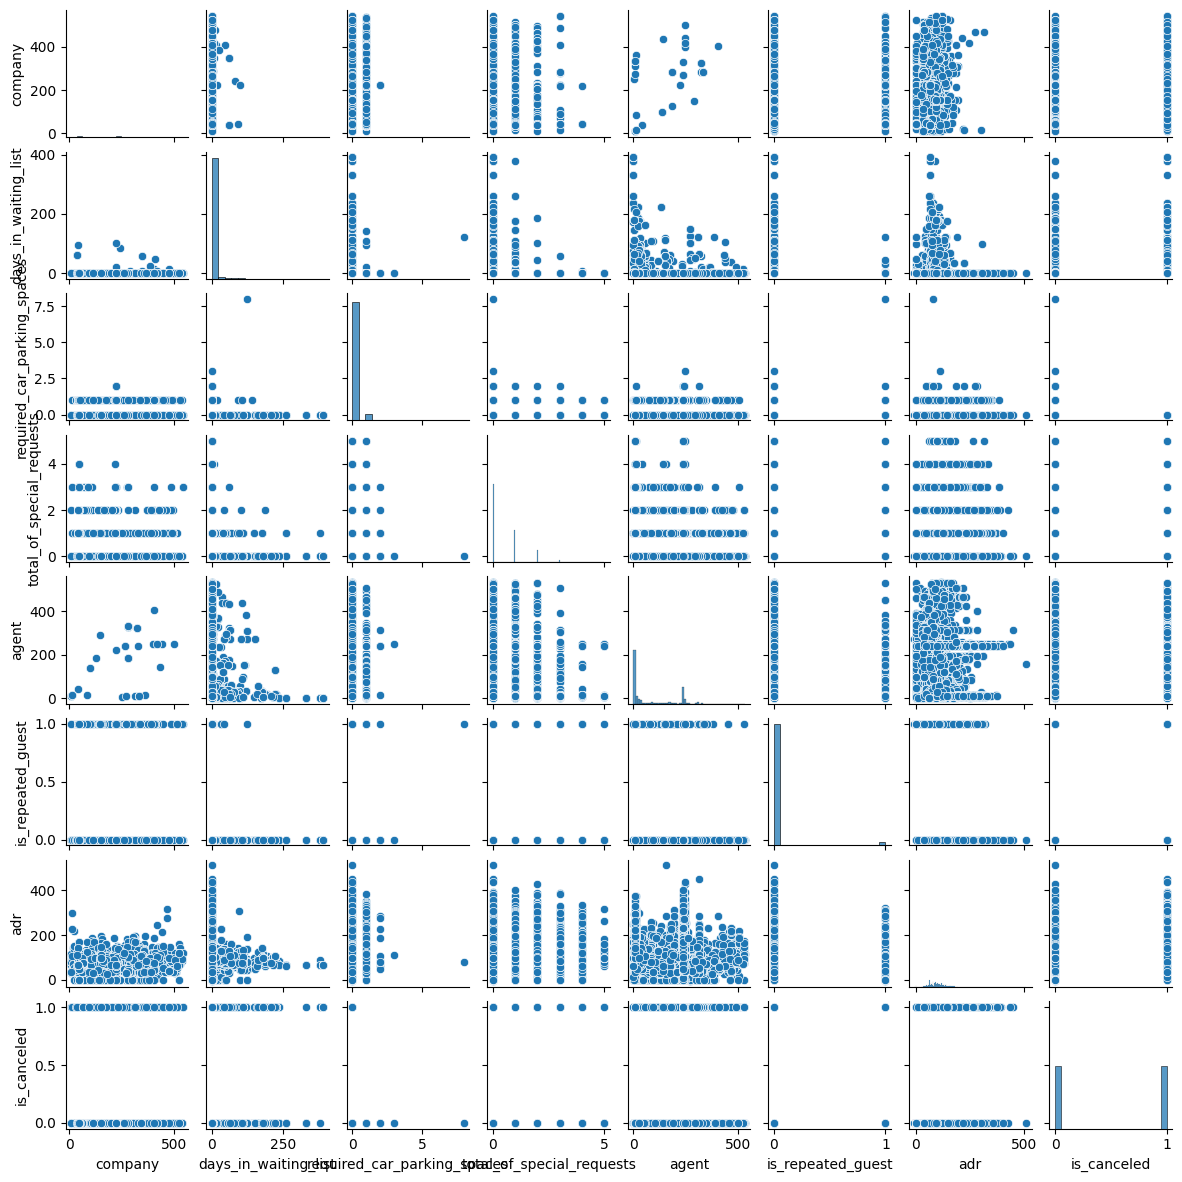

In [ ]:
sns.pairplot(data=df_trabajo,vars={"agent","company","is_repeated_guest","days_in_waiting_list","adr","required_car_parking_spaces","total_of_special_requests","is_canceled"},height=1.5)

## Correclacion


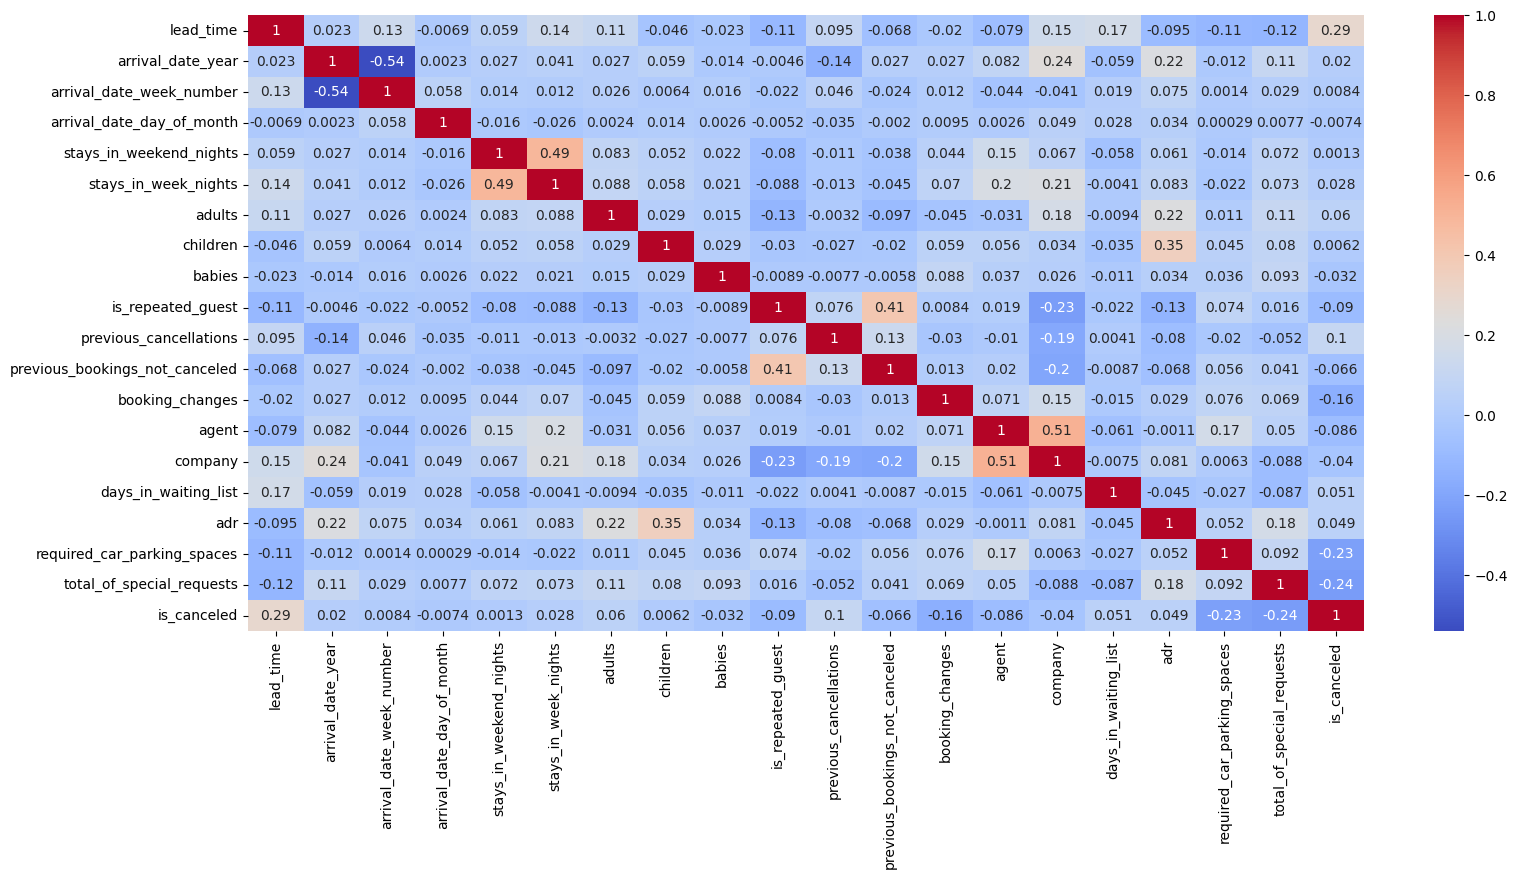

In [ ]:
# Agente y Company son irrelevantes para la correlacion de pearson ya que son variables categoricas por ser ids y su numero no tiene relevancia mas que indicar que es unico y que esta presente
df_corr = df_trabajo.copy()
tabla_de_correlacion = df_corr.corr(method="pearson")
fig, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(tabla_de_correlacion, annot = True, cmap='coolwarm')
plt.show()

In [ ]:

from scipy.stats import chi2_contingency
import numpy as np

# seleccionar solo las variables categóricas
categorical_vars = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel',
                    'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']

categorical_df = df[categorical_vars]

# calcular el coeficiente V de Cramer para cada par de variables
corr_matrix = pd.DataFrame(np.zeros((len(categorical_vars), len(categorical_vars))), index=categorical_vars, columns=categorical_vars)

for i in range(len(categorical_vars)):
    for j in range(len(categorical_vars)):
        if i != j:
            contingency_table = pd.crosstab(categorical_df[categorical_vars[i]], categorical_df[categorical_vars[j]])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            n = contingency_table.values.sum()
            phi2 = chi2/n
            r,k = contingency_table.shape
            phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
            rcorr = r - ((r-1)**2)/(n-1)
            kcorr = k - ((k-1)**2)/(n-1)
            corr_matrix.iloc[i,j] = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
corr_matrix

hotel  arrival_date_month      meal   country  \
hotel                 0.000000            0.068047  0.324768  0.281592   
arrival_date_month    0.068047            0.000000  0.093084  0.081536   
meal                  0.324768            0.093084  0.000000  0.139681   
country               0.281592            0.081536  0.139681  0.000000   
market_segment        0.147513            0.089303  0.191610  0.194102   
distribution_channel  0.187523            0.065700  0.072325  0.085850   
reserved_room_type    0.336071            0.046214  0.102905  0.084231   
assigned_room_type    0.394950            0.026988  0.111013  0.068890   
deposit_type          0.195129            0.110760  0.107416  0.343098   
customer_type         0.035952            0.101739  0.137369  0.107383   

                      market_segment  distribution_channel  \
hotel                       0.147513              0.187523   
arrival_date_month          0.089303              0.065700   
meal                        0.191610              0.072325   
country                     0.194102              0.085850   
market_segment              0.000000              0.704981   
distribution_channel        0.704981              0.000000   
reserved_room_type          0.144569              0.101688   
assigned_room_type          0.131279              0.098793   
deposit_type                0.410829              0.095442   
customer_type               0.255266              0.078343   

                      reserved_room_type  assigned_room_type  deposit_type  \
hotel                           0.336071            0.394950      0.195129   
arrival_date_month              0.046214            0.026988      0.110760   
meal                            0.102905            0.111013      0.107416   
country                         0.084231            0.068890      0.343098   
market_segment                  0.144569            0.131279      0.410829   
distribution_channel            0.101688            0.098793      0.095442   
reserved_room_type              0.000000            0.851447      0.175553   
assigned_room_type              0.851447            0.000000      0.214018   
deposit_type                    0.175553            0.214018      0.000000   
customer_type                   0.105831            0.087348      0.104584   

                      customer_type  
hotel                      0.035952  
arrival_date_month         0.101739  
meal                       0.137369  
country                    0.107383  
market_segment             0.255266  
distribution_channel       0.078343  
reserved_room_type         0.105831  
assigned_room_type         0.087348  
deposit_type               0.104584  
customer_type              0.000000

##Variables Irrelevantes 

Después de analizar los gráficos individuales, el pairplot y las matrices de correlación, hemos llegado a la conclusión de que estas variables no presentan ningún patrón visible ni son modelables de ninguna manera, para predecir si una reserva será cancelada debido a su incidencia. Por lo tanto, consideramos que las siguientes variables son irrelevantes:s
  

- Arrival_date_month
- Arrival_date_week_number
- Arrival_date_year
- Agent
- Company
- previous_bookings_not_canceled
- days_in_waiting_list
- stays_in_weekend_nights
- children
- babies
- meal
- is_repeated_guest

# Visualización de los datos: 

en esta sección se espera que puedan realizar una primera aproximación a los datos apoyándose en visualizaciones, por ejemplo: gráficos de
dispersión entre variables, histogramas, heatmaps, exploración de las columnas y
cualquier otro gráfico adicional que se considere útil justificando su utilización.

- Comparacion entre cuarto reservado y cuarto asignado y chequear si no se cambio el cuarto si cancelo o no, si se le cambio a peor si cancelo o no y si se cambio a mejor si cambio o no
-Scatterplot que muestre la relación entre el tiempo de espera en días y el precio por noche para las reservas canceladas y las que no lo fueron.

In [ ]:
df_visualizaciones = df.copy()

Text(50.72222222222221, 0.5, 'ADR')

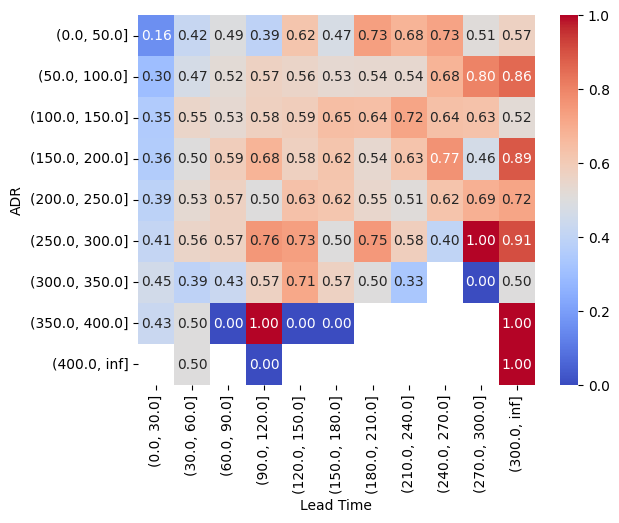

In [ ]:
import numpy as np
df_visualizaciones['lead_time_range'] = pd.cut(df['lead_time'], bins=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, np.inf])
df_visualizaciones['adr_range'] = pd.cut(df['adr'], bins=[0, 50, 100, 150, 200, 250, 300, 350, 400, np.inf])

pivot_df = df_visualizaciones.pivot_table(index='adr_range', columns='lead_time_range', values='is_canceled', aggfunc=np.mean)

sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt='.2f')
plt.xlabel('Lead Time')
plt.ylabel('ADR')

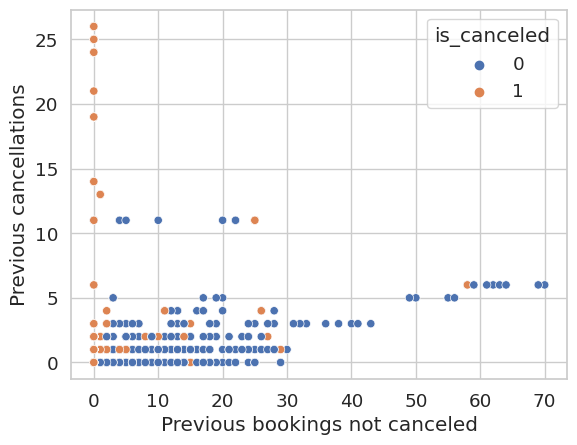

In [ ]:
#bookings cancelados con bookings no cancelados.

sns.scatterplot(data=df_visualizaciones, x="previous_bookings_not_canceled", y="previous_cancellations", hue="is_canceled", palette="deep")
plt.xlabel("Previous bookings not canceled")
plt.ylabel("Previous cancellations")
plt.title("")
plt.show()

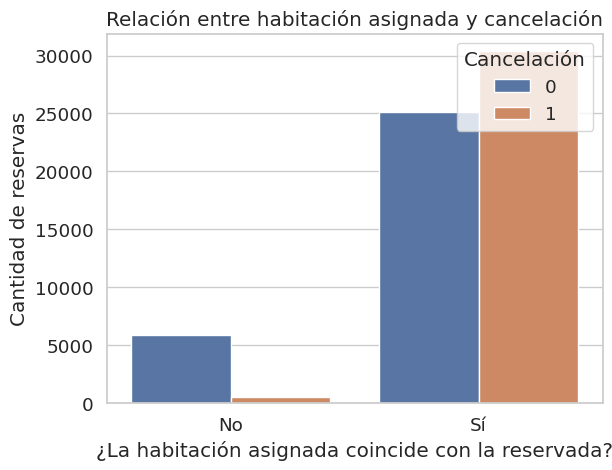

In [ ]:
#si cancelo o no si se le cambio el cuarto en relacion al que habian reservado.



sns.set(style="whitegrid", font_scale=1.2)

df_visualizaciones['habitacion_correcta'] = (df_visualizaciones['reserved_room_type'] == df_visualizaciones['assigned_room_type'])

sns.countplot(x='habitacion_correcta', hue='is_canceled', data=df_visualizaciones)
plt.title("Relación entre habitación asignada y cancelación")
plt.xlabel("¿La habitación asignada coincide con la reservada?")
plt.ylabel("Cantidad de reservas")
plt.xticks([False, True], ["No", "Sí"])
plt.legend(title="Cancelación", loc='upper right')
plt.show()

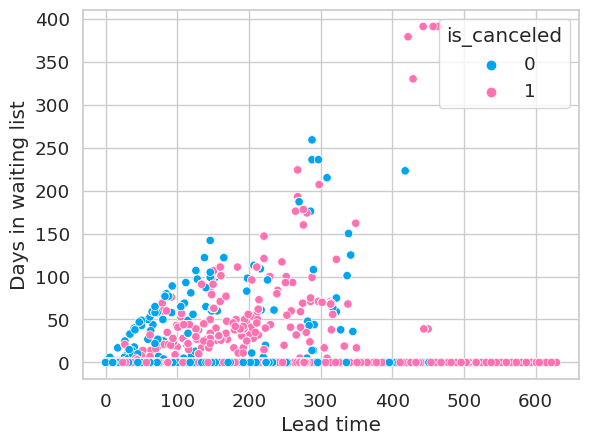

In [ ]:
#Total special request y adr.
#Car parking spaces y total special request.
#lead time y days in waiting list.

sns.scatterplot(data=df_visualizaciones, x="lead_time", y="days_in_waiting_list", hue="is_canceled", palette=["#00a4f0", "#ff71b0"])
plt.xlabel("Lead time")
plt.ylabel("Days in waiting list")
plt.title("")
plt.show()

<Axes: xlabel='adr', ylabel='days_in_waiting_list'>

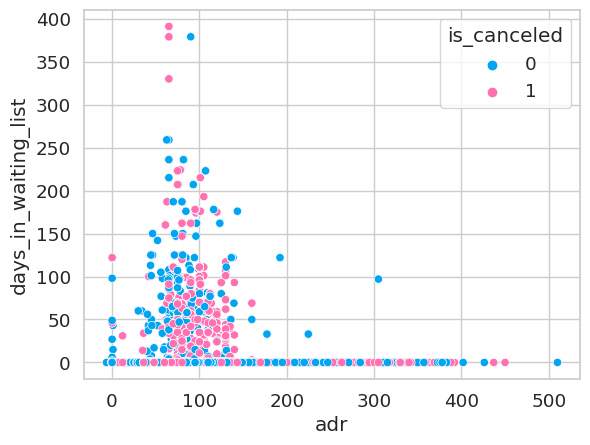

In [ ]:
sns.scatterplot(data=df_visualizaciones, x="adr", y="days_in_waiting_list", hue="is_canceled", palette=["#00a4f0", "#ff71b0"])

<Axes: xlabel='total_of_special_requests', ylabel='adr'>

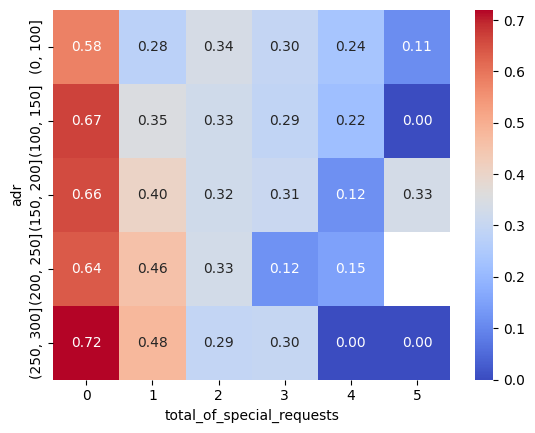

In [ ]:
adr_ranges = pd.cut(df_visualizaciones['adr'], bins=[0, 100, 150, 200, 250, 300])

sns.heatmap(df_visualizaciones.pivot_table(index=adr_ranges, columns='total_of_special_requests', 
                            values='is_canceled', aggfunc='mean'), 
                            cmap='coolwarm', annot=True, fmt='.2f')

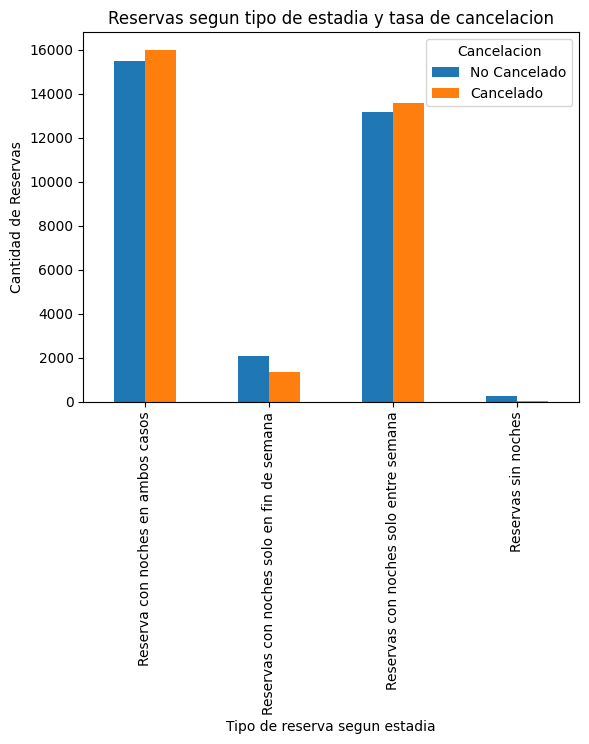

In [66]:
df_Estadia = df_trabajo.copy()

stay_mapping = {
    0: "Reservas sin noches",
    1: "Reservas con noches solo entre semana",
    2: "Reservas con noches solo en fin de semana",
    3: "Reserva con noches en ambos casos"
}


df_Estadia['Estadia'] = (
    df_Estadia['stays_in_weekend_nights'].apply(lambda x: 2 if x > 0 else 0) + 
    df_Estadia['stays_in_week_nights'].apply(lambda x: 1 if x > 0 else 0)
)


df_Estadia['Estadia'] = df_Estadia['Estadia'].map(stay_mapping)


df_Estadia['Cancelacion'] = df_Estadia['is_canceled'].apply(lambda x: 'Cancelado' if x == 1 else 'No Cancelado')


grouped = df_Estadia.groupby(['Estadia', 'Cancelacion'])['id'].count().reset_index(name='count')


pivot = grouped.pivot(index='Estadia', columns='Cancelacion', values='count')


pivot = pivot[['No Cancelado', 'Cancelado']]

pivot.plot(kind='bar')
plt.title('Reservas segun tipo de estadia y tasa de cancelacion')
plt.xlabel('Tipo de reserva segun estadia')
plt.ylabel('Cantidad de Reservas')
plt.show()


# Datos Faltantes : analizar la presencia de datos faltantes en el dataset

- Realizar análisis de datos faltantes a nivel de columna. Graficar para cada variable
el porcentaje de datos faltantes con respecto al total del dataset
- Revisar los datos faltantes o mal ingresados y tomar una decisión sobre estos:
reemplazo de valores, eliminación de registros incompletos, etc.
- En caso de realizar imputaciones comparar las distribuciones de cada atributo

In [ ]:
df_trabajo.isna().sum() * 100 / len(df)

hotel                              0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.006461
babies                             0.000000
meal                               0.000000
country                            0.356952
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                           

## Valores atípicos : analizar la existencia de valores atípicos

- Detectar valores atípicos en los datos tanto en forma univariada como
multivariada. Realizar gráficos que permitan visualizar los valores atípicos.
- Explicar qué características poseen los datos atípicos detectados.
- Decidir el tratamiento a aplicar sobre los mismos.